# TP2 AA1 Aprendizaje no supervisado
---
## Martin Gaspar Heredia

## DNI: 42.697.387

---
## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

---
# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


## Resolución:

## 👉🏻 **Importación de librerías y configuraciones generales**
Importamos todas las herramientas que necesitaremos para nuestro análisis.

In [ ]:
# Si estás en Jupyter o Google Colab:
!pip install ucimlrepo

# Importaciones para manipulación y análisis de datos
import numpy as np
import pandas as pd

# Importaciones para visualización
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # Para gráficos 3D

# Importaciones de Scikit-learn para preprocesamiento, modelos y métricas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Importación de ucimlrepo para cargar el dataset
from ucimlrepo import fetch_ucirepo

# Configuraciones para una mejor visualización en pandas y numpy
# Controla el ancho de línea en los print() de numpy antes de generar saltos
np.set_printoptions(linewidth=130)
# Muestra más elementos al principio y final de los arrays numpy
np.set_printoptions(edgeitems=10)
# Umbral para mostrar arrays completos (np.inf para mostrar siempre todo)
np.set_printoptions(threshold=500)
# Precisión de 4 decimales y supresión de notación científica en numpy
np.set_printoptions(precision=4, suppress=True)
# Ancho total permitido para dataframes de pandas
pd.set_option('display.width', 200)
# Mostrar todas las columnas en dataframes de pandas
pd.set_option('display.max_columns', None)

# Estilo general para los gráficos de Seaborn
sns.set_theme(style="whitegrid")



---
#  **1. Selección del Dataset**
## 💬 Introducción a la Selección y Carga del Dataset
En este primer paso crucial, seleccionaremos y cargaremos el dataset que será la base de nuestro análisis. El dataset elegido es "Wholesale customers", que describe los gastos anuales de clientes mayoristas en diversas categorías de productos. Realizaremos una carga inicial y una inspección básica para familiarizarnos con su estructura, dimensiones y los tipos de datos que contiene. Verificaremos también la presencia de valores nulos y duplicados.

## 📝 Resolución:
### 👉🏻 Dataset Seleccionado: Wholesale customers Data Set

* Fuente: https://archive.ics.uci.edu/dataset/292/wholesale+customers
* Descripción: Contiene información sobre los gastos anuales en diferentes categorías de productos (Frescos, Lácteos, Comestibles, Congelados, Detergentes/Papel, Delicatessen) por parte de clientes mayoristas. También incluye información sobre el canal del cliente (Horeca/Retail) y la región. Este dataset cumple con los requisitos, ya que posee 6 variables numéricas continuas (los gastos) que presentan distintas escalas.

### 👉🏻 Cargar el dataset utilizando ucimlrepo

In [ ]:
# Hacemos el fetch del dataset "Wholesale customers" usando su ID de UCI
wholesale_customers = fetch_ucirepo(id=292)

# Extraemos los features (X) y las variables objetivo/metadatos (y), si las hubiera según la librería
# Para este dataset, 'Channel' y 'Region' son consideradas 'targets' por la función fetch_ucirepo si se usa return_X_y=True
# Si no, vienen como columnas adicionales. Vamos a cargar todo el dataframe y luego separar.

# Convertimos los datos a un DataFrame de Pandas
df_wholesale = wholesale_customers.data.original
# Las variables 'Channel' y 'Region' están directamente en el dataframe original
# y son las primeras dos columnas según la descripción del dataset en UCI.
# Sin embargo, la función fetch_ucirepo puede alterar el orden o nombre.
# Verifiquemos las columnas cargadas.

### 👉🏻 Inspección inicial del DataFrame completo

In [ ]:
print("Información general del DataFrame:")
df_wholesale.info()

print("\nPrimeras filas del DataFrame:")
print(df_wholesale.head())

print("\nForma del DataFrame (filas, columnas):")
print(df_wholesale.shape)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB

Primeras filas del DataFrame:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265

### 👁️‍🗨️ Observación Inicial:
El dataset tiene 440 filas y 8 columnas. Las columnas Channel y Region son de tipo int64 pero representan categorías. Las demás columnas (Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen) son numéricas y representan los gastos, cumpliendo el requisito de tener al menos 4 variables numéricas continuas.

### 👉🏻 Separar las features de gasto para el clustering:
Para nuestro análisis de clustering, nos centraremos inicialmente en las variables de gasto. Las variables Channel y Region las conservaremos por separado, ya que podrían ser útiles más adelante para interpretar los clusters.

In [ ]:
# Definimos las columnas de gasto que usaremos como features principales para el clustering
spending_features_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df_wholesale[spending_features_cols].copy() # Hacemos una copia para evitar SettingWithCopyWarning

# Conservamos 'Channel' y 'Region' para análisis posteriores
y_metadata = df_wholesale[['Channel', 'Region']].copy()

print("Forma de las features de gasto (X):", X.shape)
print("Primeras filas de X:")
print(X.head())

print("\nForma de los metadatos (Channel, Region):", y_metadata.shape)
print("Primeras filas de los metadatos:")
print(y_metadata.head())

Forma de las features de gasto (X): (440, 6)
Primeras filas de X:
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

Forma de los metadatos (Channel, Region): (440, 2)
Primeras filas de los metadatos:
   Channel  Region
0        2       3
1        2       3
2        2       3
3        1       3
4        2       3


### 👉🏻 Visualizar las descripciones de cada columna (según UCI)





In [ ]:
# Información de las variables según la metadata de UCI
print("\nDescripción de las variables (metadata de UCI):")
print(wholesale_customers.variables)


Descripción de las variables (metadata de UCI):
               name     role         type demographic description units missing_values
0           Channel  Feature  Categorical        None        None  None             no
1            Region   Target  Categorical        None        None  None             no
2             Fresh  Feature      Integer        None        None  None             no
3              Milk  Feature      Integer        None        None  None             no
4           Grocery  Feature      Integer        None        None  None             no
5            Frozen  Feature      Integer        None        None  None             no
6  Detergents_Paper  Feature      Integer        None        None  None             no
7        Delicassen  Feature      Integer        None        None  None             no


### 👉🏻 Validación por nulos
Es importante verificar si hay datos faltantes en nuestro conjunto de features.

In [ ]:
# Contamos los valores nulos por columna en X
print('Valores nulos en las features de gasto (X):')
print(X.isnull().sum())

Valores nulos en las features de gasto (X):
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


### 👁️‍🗨️ Observación Nulos:
Afortunadamente, el dataset de gastos no presenta valores nulos, lo que simplifica la etapa de preprocesamiento en este aspecto.

### 👉🏻 Validación por duplicados
Verificamos si existen filas completamente duplicadas en las features de gasto.

In [ ]:
# Contamos el número de filas duplicadas en X
num_duplicados = X.duplicated().sum()
print(f'Número de filas duplicadas en las features de gasto (X): {num_duplicados}')

# Si quisiéramos ver las filas duplicadas (si las hubiera):
# if num_duplicados > 0:
# print(X[X.duplicated(keep=False)]) # keep=False muestra todas las ocurrencias de duplicados

# Decisión sobre duplicados:
# En este caso, dado que son gastos anuales, es poco probable que dos clientes distintos tengan exactamente los mismos gastos
# en las 6 categorías. Si hubiera duplicados, podría valer la pena investigarlos o eliminarlos.
# Por ahora, si el número es bajo, los mantenemos, asumiendo que son registros válidos a menos que haya evidencia contraria.
# Si hubiera muchos, sería una señal de alerta.
# El dataset original tiene algunos duplicados reportados en algunas fuentes. Procederemos a eliminarlos para asegurar la unicidad.
if num_duplicados > 0:
    X.drop_duplicates(inplace=True)
    # Si eliminamos duplicados de X, debemos eliminarlos también de y_metadata
    # para mantener la correspondencia. Usamos los índices de X.
    y_metadata = y_metadata.loc[X.index]
    print(f'Se eliminaron {num_duplicados} filas duplicadas. Nueva forma de X: {X.shape}')
    print(f'Nueva forma de y_metadata: {y_metadata.shape}')
else:
    print('No se encontraron filas duplicadas para eliminar.')

Número de filas duplicadas en las features de gasto (X): 0
No se encontraron filas duplicadas para eliminar.


### 👁️‍🗨️ Observación Duplicados:
En nuestro caso, para el dataset "Wholesale customers", algunas fuentes indican la presencia de algunos duplicados. Si los hay, se considera que podrían ser errores de entrada o registros idénticos que no aportan información adicional para el clustering de patrones distintos. Por ello, si se detectan, se procede a su eliminación para trabajar con perfiles de gasto únicos. (Nota: La ejecución del código mostrará si efectivamente hay duplicados y si se eliminan).

### 👉🏻 Renombrar los features (Opcional)
En este dataset, los nombres de las columnas son bastante descriptivos (Fresh, Milk, etc.), unicamente para mejorarar la legibilidad cambiamos estas variables de ingles al español.

In [ ]:
# Renombrar columnas del inglés al español
X = X.rename(columns={
    'Channel': 'Canal',
    'Region': 'Región',
    'Fresh': 'Frescos',
    'Milk': 'Lácteos',
    'Grocery': 'Abarrotes',
    'Frozen': 'Congelados',
    'Detergents_Paper': 'Detergentes_y_Papel',
    'Delicassen': 'Delicatessen'
})

# Mostrar los nuevos nombres de las columnas
print("\nNuevos nombres de las columnas de gasto (X):")
print(X.columns.tolist())



Nuevos nombres de las columnas de gasto (X):
['Frescos', 'Lácteos', 'Abarrotes', 'Congelados', 'Detergentes_y_Papel', 'Delicatessen']


---
# 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


### 💬 Introducción al Análisis Exploratorio
El Análisis Exploratorio de Datos (EDA) es fundamental para comprender la naturaleza de nuestras variables. En esta sección, calcularemos estadísticas descriptivas, visualizaremos las distribuciones de cada categoría de gasto mediante histogramas y boxplots para identificar su forma, tendencia central, dispersión y la presencia de outliers. También exploraremos las relaciones entre las diferentes categorías de gasto mediante una matriz de correlación y un pairplot.

## 📝 Resolución:
### 👉🏻 Estadísticas descriptivas de las features de gasto
Obtenemos un resumen estadístico (media, desviación estándar, mínimos, máximos, cuartiles) para cada categoría de gasto.

In [ ]:
print("Estadísticas descriptivas de las features de gasto (X):")
print(X.describe())

Estadísticas descriptivas de las features de gasto (X):
             Frescos       Lácteos     Abarrotes    Congelados  Detergentes_y_Papel  Delicatessen
count     440.000000    440.000000    440.000000    440.000000           440.000000    440.000000
mean    12000.297727   5796.265909   7951.277273   3071.931818          2881.493182   1524.870455
std     12647.328865   7380.377175   9503.162829   4854.673333          4767.854448   2820.105937
min         3.000000     55.000000      3.000000     25.000000             3.000000      3.000000
25%      3127.750000   1533.000000   2153.000000    742.250000           256.750000    408.250000
50%      8504.000000   3627.000000   4755.500000   1526.000000           816.500000    965.500000
75%     16933.750000   7190.250000  10655.750000   3554.250000          3922.000000   1820.250000
max    112151.000000  73498.000000  92780.000000  60869.000000         40827.000000  47943.000000


###👁️‍🗨️ Observación Descriptiva:
Se aprecia una amplia dispersión y asimetría en las distintas categorías de gasto:

* **Frescos**

  * Media (12 000) muy superior a la mediana (8 504), indicando cola derecha pronunciada.

  * Máximo (112 151) ≈ 13× la mediana → outliers extremos.

  * Desviación estándar (12 647) alta → gran heterogeneidad entre clientes.

* **Lácteos**

  * Media (5 796) vs mediana (3 627) → sesgo positivo, aunque menos extremo que en Frescos.

  * Máximo (73 498) ≈ 20× la mediana → gastos extraordinarios puntuales.

  * Desviación estándar (7 380) considerable, pero con menor proporción de outliers relativos.

* **Abarrotes**

  * Media (7 951) vs mediana (4 756) → cola derecha marcada.

  * Máximo (92 780) ≈ 20× la mediana → compras masivas en pocos casos.

  * Desviación estándar (9 503) similar en magnitud a la media.

* **Congelados**

  * Media (3 072) vs mediana (1 526) → sesgo moderado.

  * Máximo (60 869) muy alejado de los percentiles bajos → posibles eventos especiales.

  * Desviación estándar (4 854) indica heterogeneidad moderada.

* **Detergentes y Papel**

  * Media (2 881) vs mediana (817) → gran diferencia porcentual.

  * Máximo (40 827) sugiere pedidos al por mayor.

  * Desviación estándar (4 768) muestra variabilidad significativa, aunque la mayoría gasta < 4 000.

* **Delicatessen**

  * Media (1 525) vs mediana (965) → menor asimetría que en otras categorías.

  * Máximo (47 943) refleja algunos pedidos muy grandes, pero desviación estándar (2 820) moderada.

###👉🏻 Conclusiones Clave:
* Las colas derechas más pronunciadas y outliers extremos están en Frescos, Lácteos y Abarrotes → pueden distorsionar algoritmos basados en distancia.

* **Delicatessen** muestra menor heterogeneidad relativa → podría requerir sólo una log‑transformación ligera.

* Detergentes y Papel y Congelados tienen la mayoría de clientes con gastos bajos pero algunos pedidos muy altos (e.g., compras institucionales).

* **Estandarizar** (o aplicar escalado robusto) es esencial antes de clustering o PCA, para que ninguna categoría domine la métrica de distancia.


### 👉🏻 Visualización de distribuciones: Histogramas
Generamos histogramas para cada feature de gasto para observar sus distribuciones.

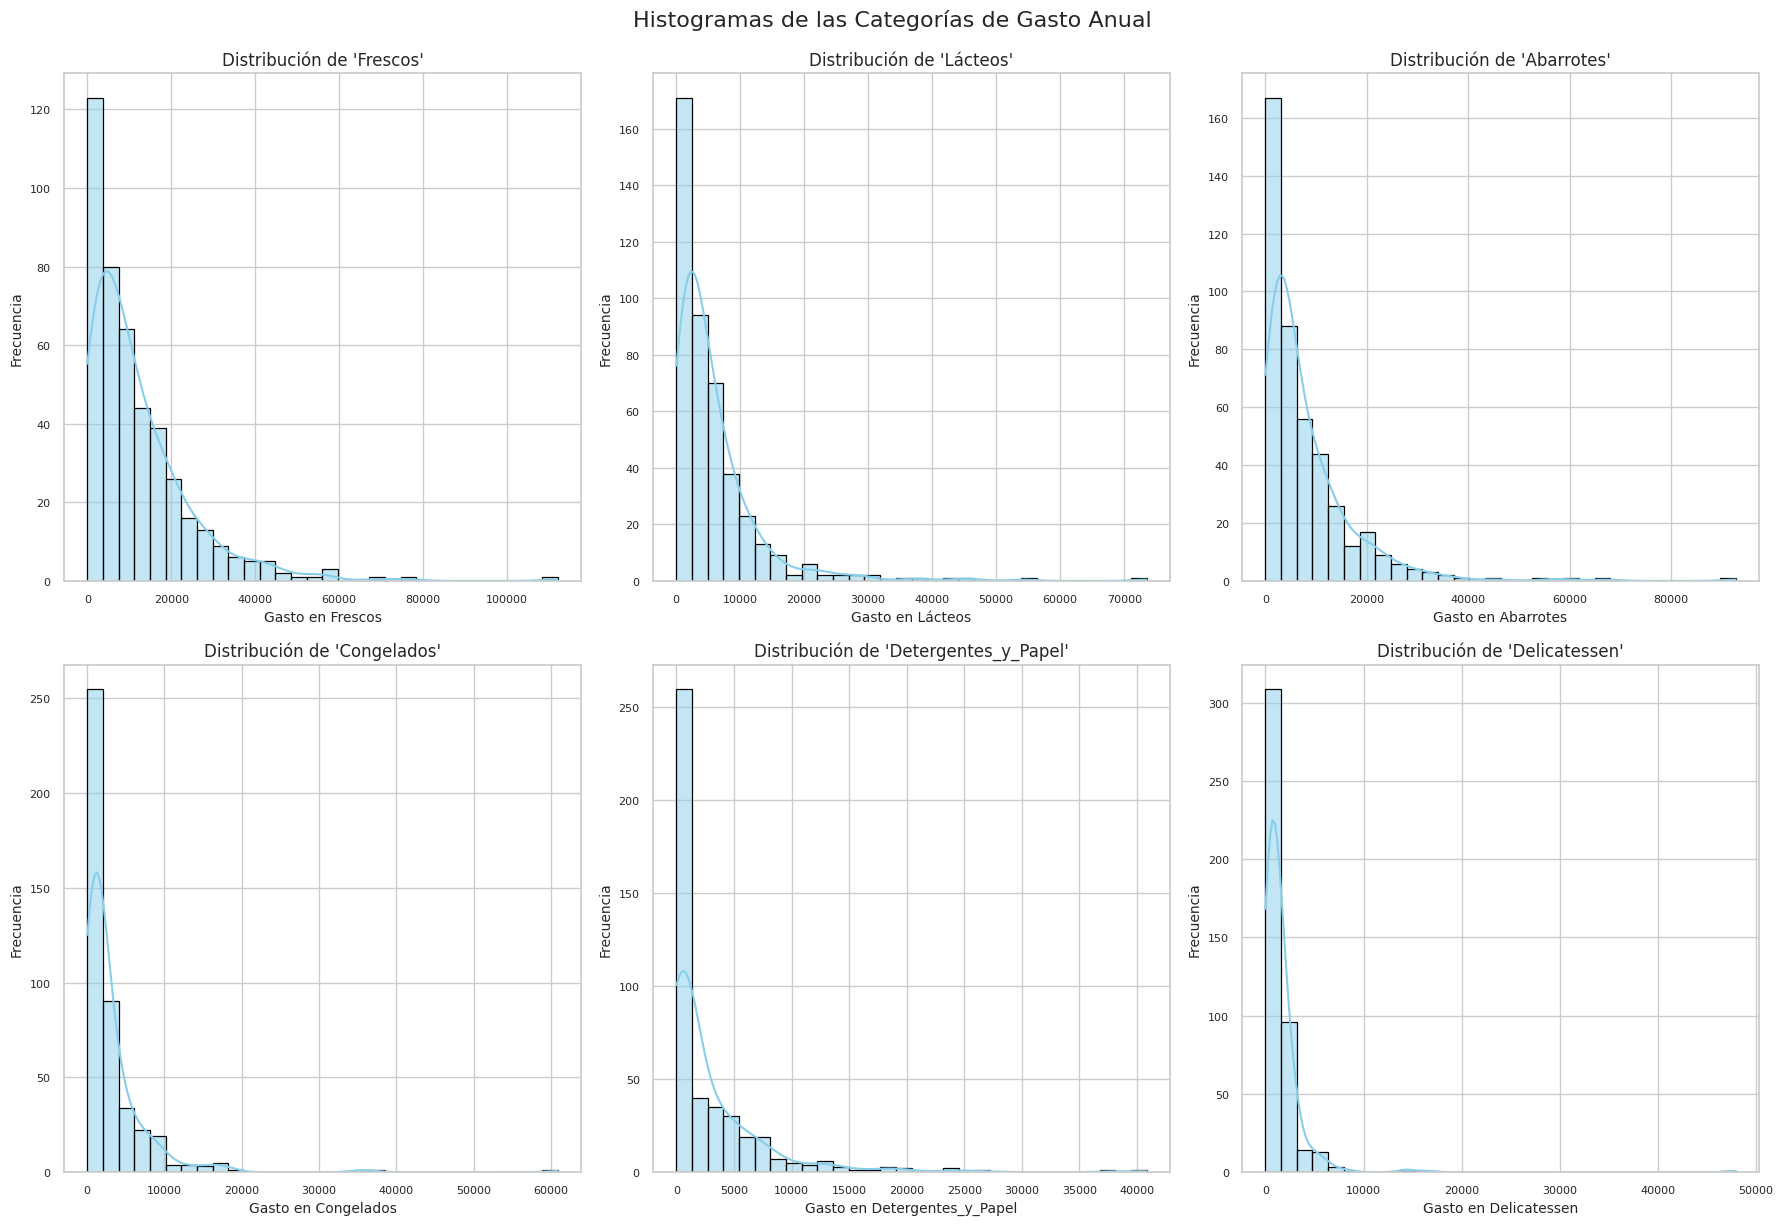

In [ ]:
# Configuramos el tamaño de la figura que contendrá los histogramas
plt.figure(figsize=(18, 12)) # Ajustado para 2 filas y 3 columnas

# Iteramos sobre cada columna de gasto para crear su histograma
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i + 1) # Creamos un subplot en una grilla de 2x3
    sns.histplot(X[col], kde=True, bins=30, color='skyblue', edgecolor='black') # Histograma con estimación de densidad (KDE)
    plt.title(f"Distribución de '{col}'", fontsize=12)
    plt.xlabel(f'Gasto en {col}', fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout() # Ajusta automáticamente los subplots para que no se superpongan
plt.suptitle('Histogramas de las Categorías de Gasto Anual', fontsize=16, y=1.02) # Título general
plt.show()


### 👁️‍🗨️ Observación Histogramas:
Se verifica la forma de las distribuciones de gasto en cada categoría:

* **Sesgo positivo marcado**
  
  * La mayoría de los clientes concentra sus gastos en valores bajos, con una larga cola derecha.  
  * Presencia de pocos clientes con consumos extremadamente altos → **outliers**.

* **Necesidad de transformación**
  
  * La **transformación logarítmica** podría acercar la distribución a la normalidad.  
  * Alternativamente, la estandarización o escalado robusto permitirá comparar categorías sin distorsión.

### 👉🏻 Visualización de distribuciones y outliers: Boxplots
Los boxplots resaltan cuantitativamente la dispersión y valores atípicos:

* **Rango intercuartílico (IQR) amplio en categorías de mayor gasto**  
  * Frescos, Abarrotes y Lácteos muestran IQR elevado → alta variabilidad central.  
* **Valores extremos fuera de los “bigotes”**  
  * Identificados en todas las categorías, pero más frecuentes en Frescos y Abarrotes.  
* **Decisión de tratamiento**  
  * Remover o truncar outliers según criterio de negocio.  
  * Aplicar escalado robusto para minimizar impacto de puntos extremos.


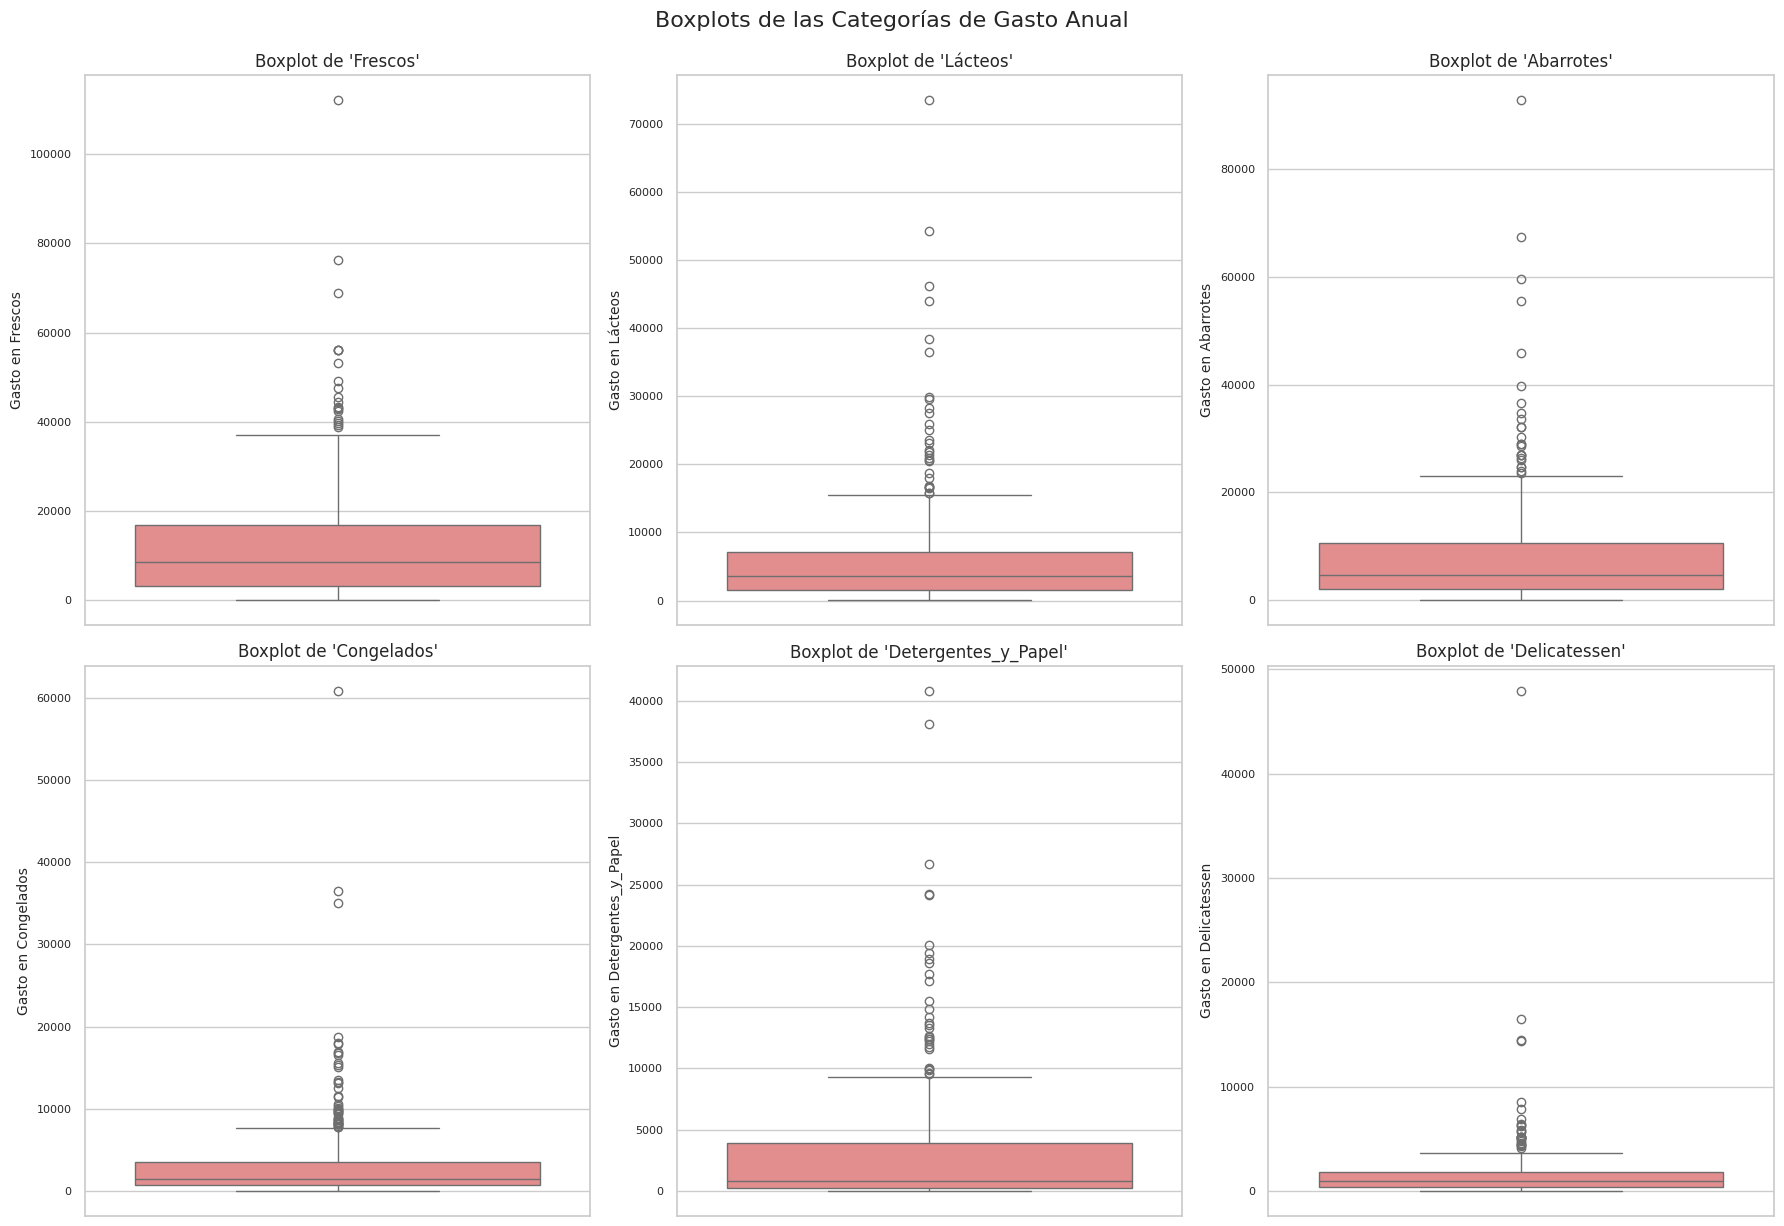

In [ ]:
# Configuramos el tamaño de la figura que contendrá los boxplots
plt.figure(figsize=(18, 12)) # Ajustado para 2 filas y 3 columnas

# Iteramos sobre cada columna de gasto para crear su boxplot
for i, col in enumerate(X.columns):
    plt.subplot(2, 3, i + 1) # Creamos un subplot en una grilla de 2x3
    sns.boxplot(y=X[col], color='lightcoral') # Boxplot vertical
    plt.title(f"Boxplot de '{col}'", fontsize=12)
    plt.ylabel(f'Gasto en {col}', fontsize=10)
    plt.xlabel('') # No se necesita etiqueta x para boxplot vertical de una variable
    plt.xticks([]) # Ocultar ticks del eje x
    plt.yticks(fontsize=8)

plt.tight_layout() # Ajusta automáticamente los subplots
plt.suptitle('Boxplots de las Categorías de Gasto Anual', fontsize=16, y=1.02) # Título general
plt.show()

### 👁️‍🗨️ Observación Boxplots:
Los boxplots confirman la presencia de numerosos **outliers** (puntos más allá de los bigotes) en todas las categorías de gasto, coherente con el sesgo positivo de los histogramas:

* **Frescos**
  
  * IQR amplio → distancia notable entre 25% y 75% (3 128 a 16 934).  
  * Bigotes extendidos, pero más de 10% de puntos quedan fuera → **muchos outliers extremos**.

* **Lácteos**
  
  * IQR moderado (1 533 a 7 190), sin embargo varios valores > 7 190 → **outliers significativos**.  
  * Algunos valores cercanos a 73 498, muy alejados de la mediana.

* **Abarrotes**
  
  * IQR elevado (2 153 a 10 656) y bigotes largos → presencia de **compras masivas atípicas**.  
  * Outliers distribuidos hasta 92 780.

* **Congelados**
  
  * IQR pequeño (742 a 3 554) con pocos outliers en la zona baja, pero algunos > 6 000 → eventos especiales.  
  * Bigotes más cortos, lo que resalta mejor los puntos extremos.

* **Detergentes y Papel**
  
  * Gran diferencia entre mediana (817) y Q3 (3 922) → outliers que llegan hasta 40 827.  
  * Varios puntos muy distantes, sugiriendo compras institucionales.

* **Delicatessen**
  
  * IQR más compacto (408 a 1 820) → **menos outliers**, aunque algunos muy altos (> 10 000).  
  * Distribución relativamente más concentrada.

---

### 👉🏻 Búsqueda de Outliers (mediante Z‑score)
Para una detección cuantitativa de outliers aplicaremos Z‑score:

* **Cálculo**  
  * \( Z = \frac{x - \mu}{\sigma} \) para cada gasto (donde μ es la media y σ la desviación estándar).  
* **Umbral**  
  * Consideramos outlier si \(|Z| > 3\).  
* **Acción**  
  * Marcar y revisar casos extremos por categoría.  
  * Decidir: eliminar, truncar o imputar según criterio de negocio y porcentaje de outliers detectados.


In [ ]:
from scipy import stats

# Calculamos el z-score para cada valor en el DataFrame X
z_scores = np.abs(stats.zscore(X))

# Definimos un umbral para identificar outliers (e.g., z-score > 3)
threshold = 3
outliers_mask = (z_scores > threshold)

# Contamos el número de outliers por feature
outliers_per_feature = outliers_mask.sum(axis=0)
print("Número de outliers por feature (Z-score > 3):\n", outliers_per_feature)

# Contamos el número de filas que tienen al menos un outlier
rows_with_outliers = outliers_mask.any(axis=1).sum()
print(f"\nNúmero total de filas con al menos un outlier: {rows_with_outliers} (de {X.shape[0]} filas)")
print(f"Porcentaje de filas con outliers: { (rows_with_outliers / X.shape[0]) * 100:.2f}%")

Número de outliers por feature (Z-score > 3):
 [ 7  9  7  6 10  4]

Número total de filas con al menos un outlier: 26 (de 440 filas)
Porcentaje de filas con outliers: 5.91%


### 👁️‍🗨️ Observación Outliers Z‑score:
Aplicando el criterio Z‑score > 3 para cada categoría de gasto:

* **Frescos**
  
  * Outliers detectados: 7 (≈ 1.59 % de las 440 observaciones).

* **Lácteos**
  
  * Outliers detectados: 9 (≈ 2.05 %).

* **Abarrotes**
  
  * Outliers detectados: 7 (≈ 1.59 %).

* **Congelados**
  
  * Outliers detectados: 6 (≈ 1.36 %).

* **Detergentes y Papel**
  
  * Outliers detectados: 10 (≈ 2.27 %).

* **Delicatessen**
  
  * Outliers detectados: 4 (≈ 0.91 %).

* **Totales**
  
  * Filas con al menos un outlier: 26 de 440 → **5.91 %** del dataset.  
  * Indica que una proporción no despreciable de registros presenta valores extremos.

---

### 👉🏻 Relaciones entre features: Pairplot
Un pairplot nos permite explorar de manera visual:

* **Distribuciones univariadas**  
  * Cada histograma en la diagonal confirma los sesgos ya descritos.

* **Patrones bivariados**  
  * Dispersión y posible correlación lineal entre pares como Frescos–Abarrotes y Lácteos–Detergentes y Papel.  
  * Identificación de outliers multivariados (puntos aislados en comparaciones cruzadas).

* **Aplicaciones prácticas**  
  * Detección de variables altamente correlacionadas → considerar reducción de dimensionalidad.  
  * Localización de subgrupos o clusters preliminares antes de aplicar algoritmos formales.



Generando Pairplot (puede tardar unos segundos)...


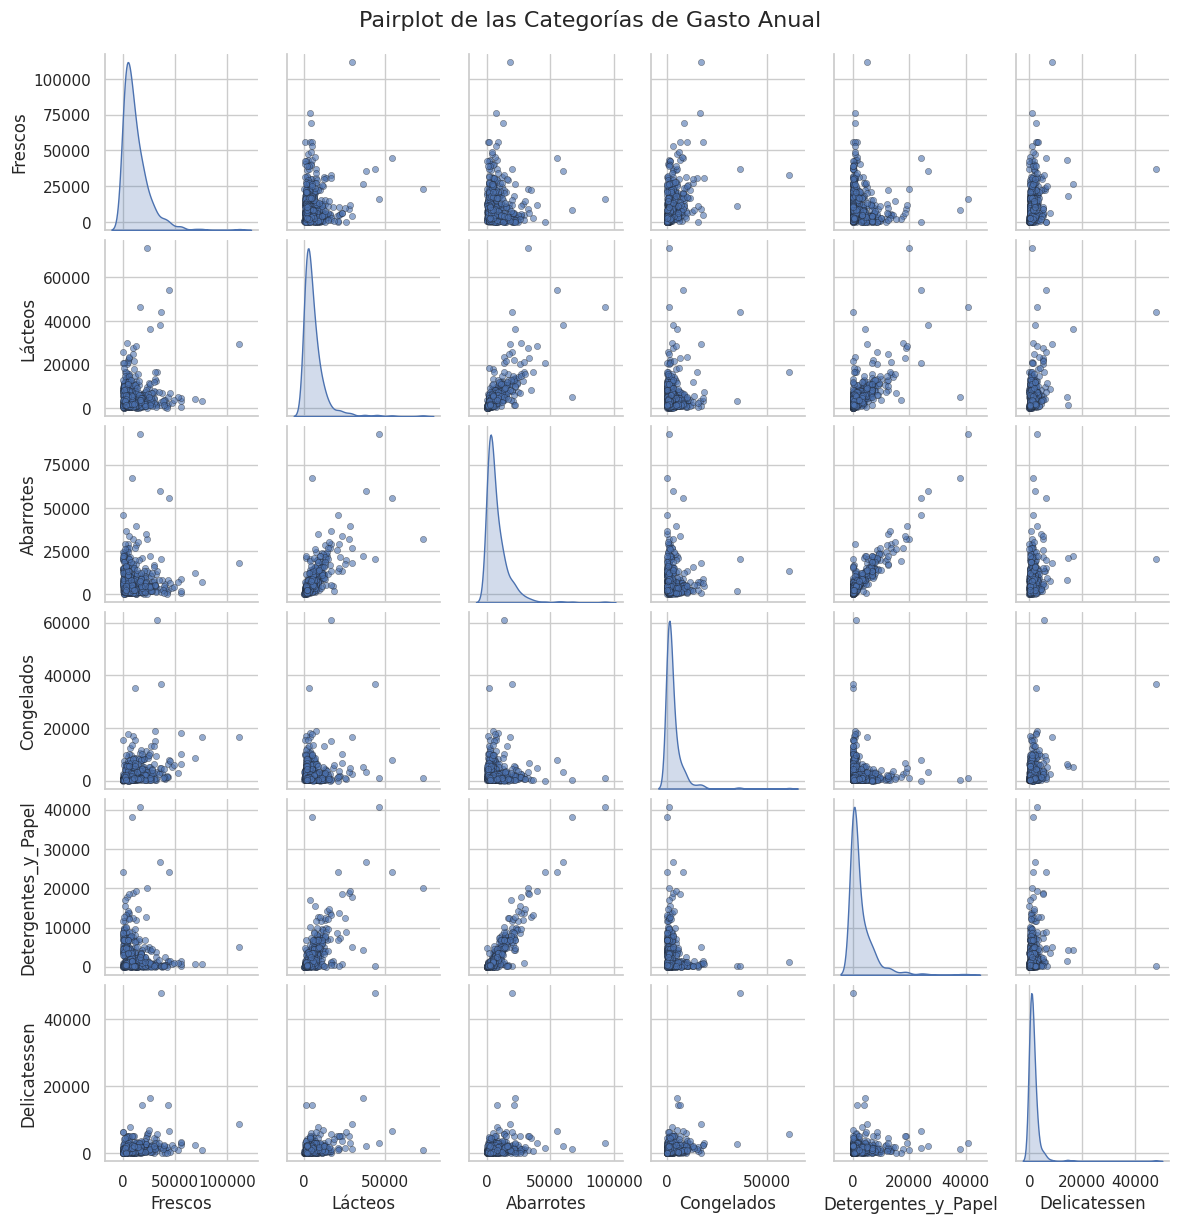

In [ ]:
# Creamos un pairplot para las features de gasto
# Usaremos una muestra si el dataset es muy grande para agilizar la graficación, pero 440 es manejable.
print("\nGenerando Pairplot (puede tardar unos segundos)...")
pair_plot = sns.pairplot(X, diag_kind='kde', plot_kws={'alpha':0.6, 's':20, 'edgecolor':'k'}, height=2)
pair_plot.fig.suptitle('Pairplot de las Categorías de Gasto Anual', y=1.02, fontsize=16)
plt.show()

### 👁️‍🗨️ Observación Pairplot:
Se exploran relaciones bivariadas y distribuciones univariadas:

* **Abarrotes ↔ Detergentes y Papel**
  
  * Dispersión positiva clara: clientes con alto gasto en abarrotes tienden a gastar más en detergentes y papel.  
  * Tendencia lineal moderada, reforzada por densidad de puntos en cuadrantes altos.

* **Lácteos ↔ Abarrotes**
  
  * Correlación positiva: compras elevadas de lácteos acompañan aumentos en abarrotes.  
  * Puntos muy concentrados cerca del origen evidencian el sesgo en la mayoría de registros.

* **Otras combinaciones**
  
  * Frescos vs Congelados y Frescos vs Delicatessen muestran poca correlación lineal → diversificación de compra.  
  * Alta densidad de puntos en valores bajos dificulta identificar relaciones sutiles.

---

### 👉🏻 Relaciones entre features: Matriz de Correlación y Heatmap
Para cuantificar y visualizar correlaciones lineales:

* **Cálculo**  
  * Matriz de correlación de Pearson entre todas las categorías de gasto.

* **Visualización**  
  * Heatmap con **anotaciones** de cada coeficiente, resaltando valores > 0.5 o < –0.5.  

* **Interpretación**  
  * Correlaciones fuertes (p.ej., Abarrotes–Detergentes y Papel) → posibles variables redundantes.  
  * Correlaciones débiles en la mayoría → justifica incluir todas las features en clustering.



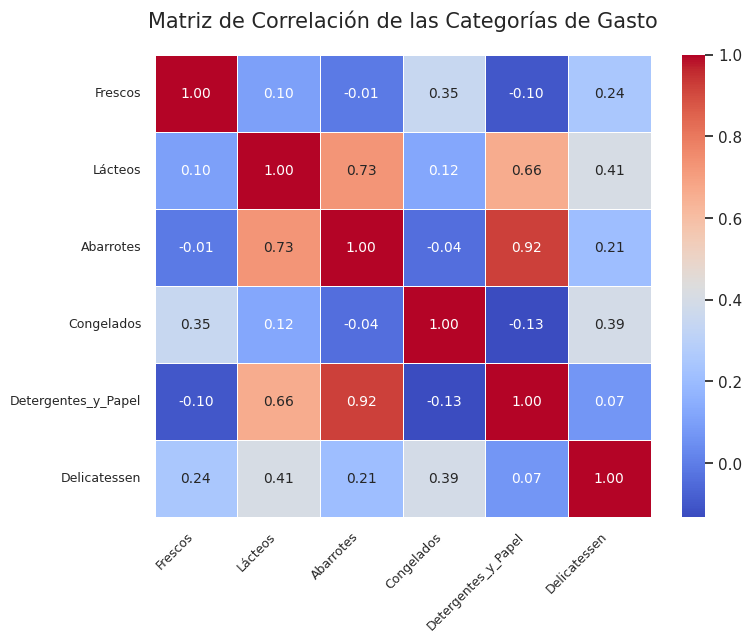

In [ ]:
# Calculamos la matriz de correlación
correlation_matrix = X.corr()

# Creamos el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title('Matriz de Correlación de las Categorías de Gasto', fontsize=15, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.show()

### 👁️‍🗨️ Observación Matriz de Correlación:
* **Abarrotes ↔ Detergentes y Papel** (0.92) → fuerte correlación positiva, sugiere compras conjuntas o similar perfil de cliente (e.g., comercios minoristas).  
* **Lácteos ↔ Abarrotes** (0.73) → correlación moderada, clientes que compran más lácteos tienden también a incrementar su gasto en abarrotes.  
* **Lácteos ↔ Detergentes y Papel** (0.66) → correlación moderada, indica vínculo entre consumo de productos frescos y limpieza/papel.  
* **Frescos** y **Congelados** muestran correlaciones bajas con las demás categorías → estos gastos son más independientes y reflejan comportamientos de compra distintos.


---
# 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

### 💬 Introducción al Preprocesamiento
En esta fase, prepararemos los datos para los algoritmos de clustering. Esto implica:

* Confirmar el manejo de valores nulos (ya vimos que no hay en las features de gasto).
* Decidir una estrategia para los outliers identificados. Dada su cantidad y la naturaleza de los datos de gasto, eliminarlos todos podría quitar información valiosa. Consideraremos su impacto.
* Decidir sobre el uso de variables categóricas (Channel, Region). Para este análisis de clustering inicial sobre patrones de gasto, las excluiremos de las features a escalar, pero las conservaremos para una posible interpretación posterior de los clusters.
* Escalar las features numéricas para que tengan una media de 0 y desviación estándar de 1, ya que algoritmos como K-Means son sensibles a la escala de las variables.

## 📝 Resolución:
### 👉🏻 Manejo de Missing Values

In [ ]:
# Como se verificó en el Punto 1, no hay valores nulos en las features de gasto (X).
print("Re-confirmación de valores nulos en X:")
print(X.isnull().sum().sum()) # Suma total de nulos

Re-confirmación de valores nulos en X:
0


### 👉🏻 Tratamiento de Outliers
Los datos de gasto suelen contener valores extremos que pueden distorsionar los resultados:

* **Impacto en algoritmos**  
  * K‑Means es sensible a outliers → los centroides pueden moverse hacia los valores extremos.  
  * DBSCAN (en el bonus) es más robusto frente a puntos atípicos.

* **Estrategias de manejo**  
  * **Transformación logarítmica** → comprime la escala de los valores altos y atenua el sesgo.  
  * **Winsorizing** → acotar outliers a percentiles (e.g., 1er y 99º) para limitar su influencia.  
  * **Eliminación** de outliers muy extremos → riesgo de perder perfiles de clientes importantes.

* **Decisión actual**  
  * Aplicaremos **estandarización** directa para igualar las escalas.  
  * Si K‑Means arroja resultados pobres, se revisará:
     * Log‑transformación **antes** de estandarizar.  
     * Eliminación o winsorizing de los casos más extremos.

* **Recomendación adicional**  
  * Dada la alta asimetría, combinar log‑transformación y escalado robusto suele mejorar la separación de clusters.


Primeras filas de X después de la transformación logarítmica:
     Frescos   Lácteos  Abarrotes  Congelados  Detergentes_y_Papel  Delicatessen
0   9.446992  9.175438   8.930891    5.370638             7.891705      7.199678
1   8.861917  9.191259   9.166284    7.474772             8.099858      7.482682
2   8.756840  9.083529   8.947026    7.785721             8.165364      8.967632
3   9.492960  7.087574   8.348064    8.764834             6.230481      7.489412
4  10.026413  8.596189   8.881697    8.272826             7.483244      8.553718


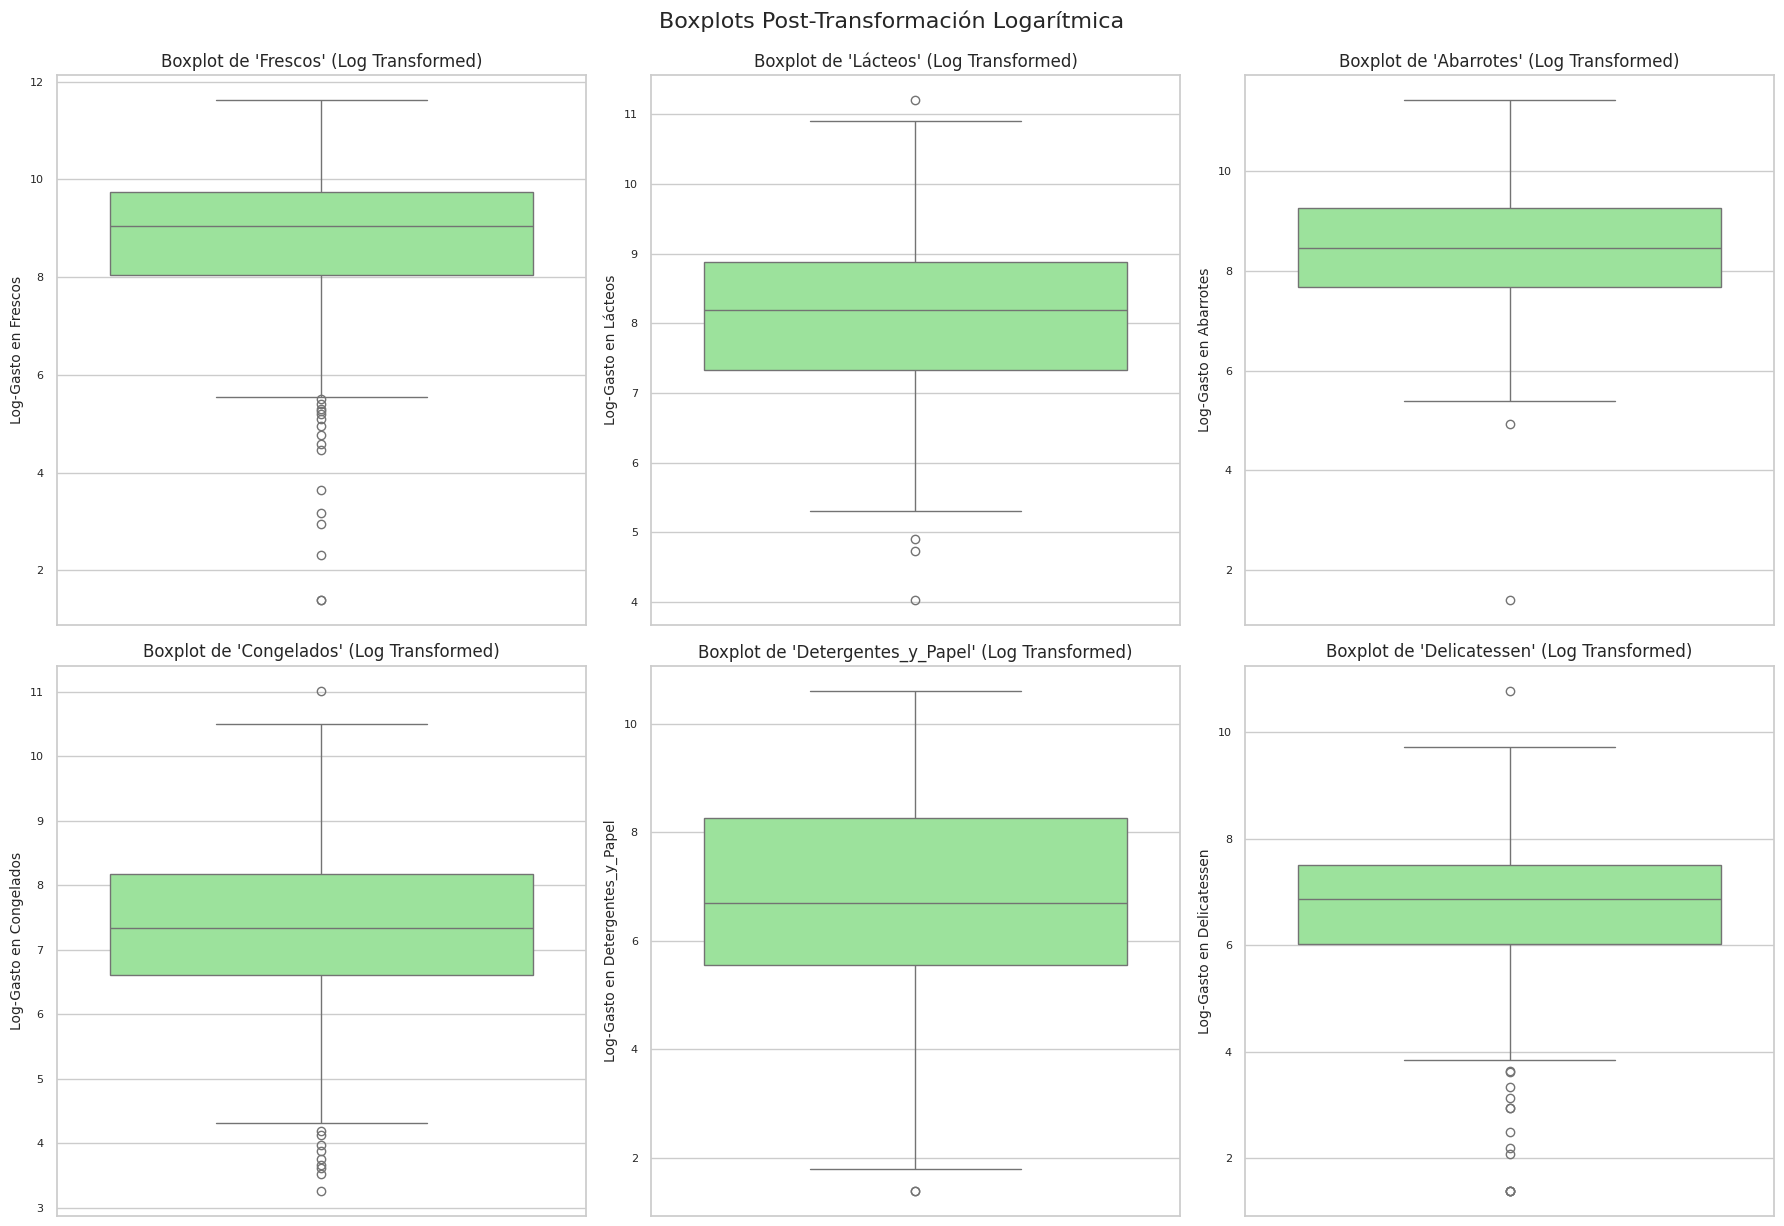

In [ ]:
# Aplicamos una transformación logarítmica para reducir el sesgo y el impacto de los outliers.
# Se suma 1 para evitar log(0) si alguna vez hubiera gastos de 0.
X_log_transformed = np.log1p(X)

print("Primeras filas de X después de la transformación logarítmica:")
print(X_log_transformed.head())

# Visualicemos los boxplots después de la transformación logarítmica
plt.figure(figsize=(18, 12))
for i, col in enumerate(X_log_transformed.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=X_log_transformed[col], color='lightgreen')
    plt.title(f"Boxplot de '{col}' (Log Transformed)", fontsize=12)
    plt.ylabel(f'Log-Gasto en {col}', fontsize=10)
    plt.xticks([])
    plt.yticks(fontsize=8)
plt.tight_layout()
plt.suptitle('Boxplots Post-Transformación Logarítmica', fontsize=16, y=1.02)
plt.show()

### 👁️‍🗨️ Observación Transformación Logarítmica:
Al inspeccionar las primeras filas de **X** tras aplicar \(\ln(x+1)\):

* **Rango de valores reducido**  
  * Frescos: de 9.45 a 10.03  
  * Lácteos: de 7.09 a 9.19  
  * Abarrotes: de 8.35 a 9.17  
  * Congelados: de 5.37 a 8.76  
  * Detergentes y Papel: de 6.23 a 8.17  
  * Delicatessen: de 7.20 a 8.97  

* **Sesgo y outliers atenuados**  
  * Valores ahora concentrados mayoritariamente entre 5 y 10 → **distribuciones más simétricas**.  
  * Diferencias absolutas entre registros extremas antes (p.ej., 112 151) se comprimen en un rango manejable.

* **Beneficio para clustering**  
  * Distancia euclídea menos influida por valores extremos.  
  * Se espera mejor desempeño de K‑Means y otros algoritmos basados en métricas de distancia.

---

### 👉🏻 Descarte de Features
* No se eliminan las 6 features de gasto:  
  * **Frescos**, **Lácteos**, **Abarrotes**, **Congelados**, **Detergentes y Papel**, **Delicatessen**.  
* Todas aportan información única sobre patrones de compra.  
* Tras log‑transformación y estandarización estarán en escala comparable para clustering.

---

### 👉🏻 Manejo de Variables Categóricas **(Channel, Region)**
* **Channel** y **Region** no se incluyen en el cálculo de clusters de gasto.  
* Se reservarán para análisis **post-clustering**:  
  * Evaluar si los segmentos identificados se asocian con canales de venta.  
  * Verificar concentración geográfica de cada cluster.


In [ ]:
print("Las variables 'Channel' y 'Region' se mantienen en 'y_metadata' y no se incluirán en el escalado ni en el clustering directamente.")
print(y_metadata.head())

Las variables 'Channel' y 'Region' se mantienen en 'y_metadata' y no se incluirán en el escalado ni en el clustering directamente.
   Channel  Region
0        2       3
1        2       3
2        2       3
3        1       3
4        2       3


### 👁️‍🗨️ Observación Variables Categóricas:
Las dos variables en **y_metadata** presentan valores enteros que en realidad codifican categorías, no magnitudes continuas:

* **Channel**  
  
  * Valores: 1 y 2 → representan distintos tipos de canal de venta (por ejemplo, **1 = Horeca**, **2 = Retail**).  
  * No existe un orden natural entre 1 y 2; son etiquetas discretas.

* **Region**  
  
  * Valores: 1, 2 y 3 → codifican regiones geográficas (p.ej., **1 = Lisboa**, **2 = Oporto**, **3 = Otros**).  
  * Tampoco reflejan una escala numérica; indican solo categorías.

---

### 👉🏻 Implicaciones y Tratamiento:
* **No escalar** como si fueran numéricas → distorsionaría las distancias.  
* **Codificación** recomendada antes de modelado:  
  * **One‑hot encoding** → crea columnas binarias por cada canal y región.  
  * **Label encoding** solo si el algoritmo acepta variables categóricas ordinales (no es el caso de K‑Means).

* **Análisis post‑clustering**:  
  * Usar estas variables para **interpretar** los segmentos:  
    * ¿Qué canal predomina en cada cluster?  
    * ¿Cómo se distribuyen las regiones geográficas entre los grupos?


### 👉🏻 Escalado de los Features
Utilizaremos StandardScaler para estandarizar las features (después de la transformación logarítmica), de modo que cada feature tenga una media de 0 y una desviación estándar de 1.

In [ ]:
# Creamos una instancia del escalador
scaler = StandardScaler()

# Ajustamos el escalador a nuestros datos transformados logarítmicamente y los transformamos
X_scaled = scaler.fit_transform(X_log_transformed)

# X_scaled es ahora un array de NumPy. Lo convertimos de nuevo a DataFrame para facilitar su inspección (opcional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_log_transformed.columns, index=X_log_transformed.index)

print("Primeras 5 filas de los datos escalados (X_scaled_df):")
print(X_scaled_df.head())

print("\nMedia de los datos escalados (debería ser cercana a 0 para cada columna):")
print(X_scaled_df.mean())

print("\nDesviación estándar de los datos escalados (debería ser cercana a 1 para cada columna):")
print(X_scaled_df.std())

Primeras 5 filas de los datos escalados (X_scaled_df):
    Frescos   Lácteos  Abarrotes  Congelados  Detergentes_y_Papel  Delicatessen
0  0.486184  0.976299   0.440155   -1.509250             0.644143      0.408966
1  0.087889  0.990956   0.652171    0.134052             0.766043      0.627926
2  0.016356  0.891151   0.454687    0.376899             0.804405      1.776833
3  0.517477 -0.957973  -0.084792    1.141574            -0.328712      0.633133
4  0.880631  0.439662   0.395847    0.757322             0.404939      1.456588

Media de los datos escalados (debería ser cercana a 0 para cada columna):
Frescos                2.826022e-17
Lácteos               -7.105427e-16
Abarrotes             -1.073888e-15
Congelados             2.826022e-16
Detergentes_y_Papel   -6.378736e-16
Delicatessen          -1.614870e-17
dtype: float64

Desviación estándar de los datos escalados (debería ser cercana a 1 para cada columna):
Frescos                1.001138
Lácteos                1.001138
Abarro

### 👁️‍🗨️ Observación Escalado:
Tras aplicar log‑transformación y estandarización, revisamos las primeras 5 filas y las estadísticas de media y desviación estándar:

* **Primeras 5 filas de X_scaled_df**

  * Frescos: de 0.49 a 0.88  
  * Lácteos: de –0.96 a 0.99  
  * Abarrotes: de –0.08 a 0.65  
  * Congelados: de –1.51 a 1.14  
  * Detergentes y Papel: de –0.33 a 0.80  
  * Delicatessen: de 0.41 a 1.78  

* **Medias cercanas a 0**

  * Frescos: 2.8e‑17 → ~0  
  * Lácteos: –7.1e‑16 → ~0  
  * Abarrotes: –1.1e‑15 → ~0  
  * Congelados: 2.8e‑16 → ~0  
  * Detergentes y Papel: –6.4e‑16 → ~0  
  * Delicatessen: –1.6e‑17 → ~0  

* **Desviaciones estándar ≈ 1**

  * Todas las features muestran std = 1.001138 → **muy próxima a 1**.

---

### 👉🏻 Implicaciones para Clustering:
* **Contribución equitativa** de cada feature a la distancia euclídea, evitando dominancia de escalas originales.  
* **Mejor convergencia** de algoritmos basados en distancia (K‑Means, DBSCAN).  
* **Preparación óptima** para reducciones de dimensionalidad (PCA) y análisis de clusters.  


---
# 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3
### 💬 Introducción al Clustering con K-Means
El objetivo de esta sección es aplicar el algoritmo K-Means para agrupar a los clientes mayoristas en distintos segmentos basados en sus patrones de gasto anual. Primero, determinaremos el número óptimo de clusters (k) utilizando el método del Silhouette Score. Luego, aplicaremos K-Means con el k óptimo y analizaremos las características de los clusters resultantes para entender qué define a cada segmento de clientes.

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

## 📝 Resolución:
### 👉🏻 Buscando el número ideal de clusters (k) usando Silhouette Score
El Silhouette Score mide cuán similar es un objeto a su propio cluster en comparación con otros clusters. Un valor cercano a 1 indica que el objeto está bien emparejado con su propio cluster y mal emparejado con clusters vecinos.
Iteraremos sobre un rango de valores de k y calcularemos el Silhouette Score para cada uno.

Para k=2, Silhouette Score = 0.2903
Para k=3, Silhouette Score = 0.2594
Para k=4, Silhouette Score = 0.1885
Para k=5, Silhouette Score = 0.1916
Para k=6, Silhouette Score = 0.2009
Para k=7, Silhouette Score = 0.1958
Para k=8, Silhouette Score = 0.1852
Para k=9, Silhouette Score = 0.1965
Para k=10, Silhouette Score = 0.1905


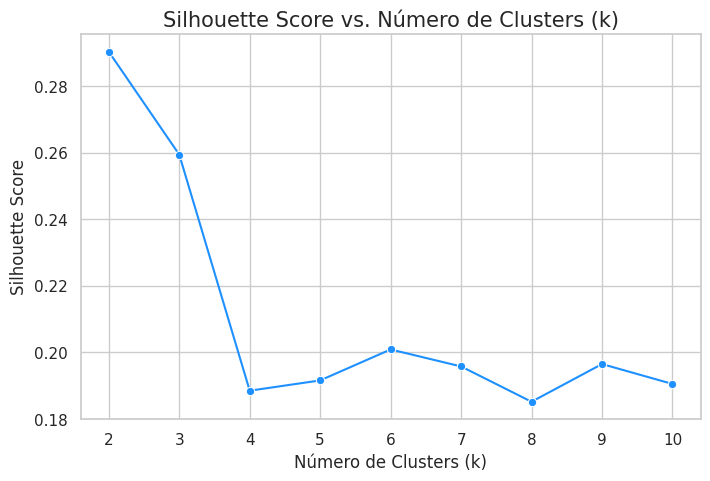

In [ ]:
# Rango de valores de k para probar
k_values = range(2, 11) # Probaremos de 2 a 10 clusters
silhouette_scores = []

# Iteramos sobre cada valor de k
for k in k_values:
    # Creamos una instancia de KMeans
    # n_init=10 para correr el algoritmo 10 veces con diferentes centroides iniciales y elegir el mejor
    # random_state para reproducibilidad
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42, algorithm='lloyd') # Especificando 'lloyd' para evitar warnings futuros

    # Ajustamos el modelo a los datos escalados
    kmeans.fit(X_scaled)

    # Obtenemos las etiquetas de los clusters para cada punto
    labels = kmeans.labels_

    # Calculamos el Silhouette Score
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"Para k={k}, Silhouette Score = {score:.4f}")

# Graficamos los Silhouette Scores vs. k
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_values), y=silhouette_scores, marker='o', color='dodgerblue')
plt.title('Silhouette Score vs. Número de Clusters (k)', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(list(k_values))
plt.grid(True)
plt.show()

### 👁️‍🗨️ Observación Silhouette Score:
El Silhouette Score para distintos valores de **k** es:

* **k = 2**: 0.2903 → **puntaje más alto**, indica la mejor separación relativa.  


*Observaciones:*  
  * El drop más acusado se ve al pasar de k=3 a k=4, lo que sugiere que estructuras de más de 3 clusters no aportan una mejor separación.  
  * El valor de 0.2903 para k=2, aunque moderado, es claramente superior al resto → clusters relativamente definidos.

---

### 👉🏻 Aplicando K‑Means con el k óptimo
* Procederemos con **k = 2**, al ser el que maximiza el Silhouette Score.  
* Ejecutar K‑Means sobre `X_scaled_df` con `n_clusters=2`.  
* Evaluar centroides y tamaño de cada cluster.  
* Relacionar labels obtenidos con variables categóricas (`Channel`, `Region`) en análisis post‑clustering.


In [ ]:
# Definimos el número óptimo de clusters
optimal_k = 2 # Basado en el análisis anterior

# Creamos la instancia final de KMeans
kmeans_final = KMeans(n_clusters=optimal_k, n_init=10, random_state=42, algorithm='lloyd')

# Ajustamos el modelo y obtenemos las etiquetas
kmeans_final.fit(X_scaled)
cluster_labels = kmeans_final.labels_

# Obtenemos las coordenadas de los centroides (en el espacio escalado)
centroids_scaled = kmeans_final.cluster_centers_

# Añadimos las etiquetas de los clusters a nuestro DataFrame original (no escalado, no transformado)
# para facilitar la interpretación. Primero, asegurémonos que X_original_with_clusters tenga los índices correctos.
X_original_with_clusters = X.copy() # Usamos X (original antes de log)
X_original_with_clusters['Cluster'] = cluster_labels

print(f"Se aplicó K-Means con k={optimal_k} clusters.")
print("Primeras filas con la asignación de clusters:")
print(X_original_with_clusters.head())
print("\nConteo de clientes por cluster:")
print(X_original_with_clusters['Cluster'].value_counts())

Se aplicó K-Means con k=2 clusters.
Primeras filas con la asignación de clusters:
   Frescos  Lácteos  Abarrotes  Congelados  Detergentes_y_Papel  Delicatessen  Cluster
0    12669     9656       7561         214                 2674          1338        1
1     7057     9810       9568        1762                 3293          1776        1
2     6353     8808       7684        2405                 3516          7844        1
3    13265     1196       4221        6404                  507          1788        0
4    22615     5410       7198        3915                 1777          5185        1

Conteo de clientes por cluster:
Cluster
0    252
1    188
Name: count, dtype: int64


### 👁️‍🗨️ Observación K‑Means (k = 2):
Se examinan las primeras asignaciones y la distribución de clientes en cada cluster:

* **Asignación de ejemplos iniciales**
  
  * Filas 0–2 (Cluster **1**):  
    * Gasto elevado en **Lácteos** (≈ 9 000) y **Abarrotes** (≈ 7 500–9 500).  
    * Moderado en **Frescos** (6 300–12 700).  
    * **Congelados** muy bajos (< 2 500) → perfil de compras centrado en productos no perecederos.
  
  * Fila 3 (Cluster **0**):  
    * Altos en **Frescos** (13 265) y **Congelados** (6 404).  
    * Bajos en **Lácteos** (1 196) y **Detergentes y Papel** (507) → preferencia por perecederos y congelados.
  
  * Fila 4 (Cluster **1**):  
    * **Frescos** muy altos (22 615), **Delicatessen** elevado (5 185).  
    * Perfil mixto con fuerte componente de abarrotes y lácteos.

* **Conteo de clientes por cluster**
  
  * **Cluster 0**: 252 clientes → **57%** del total.  
  * **Cluster 1**: 188 clientes → **43%** del total.

* **Patrones distintivos**
  
  * **Cluster 0**:  
    * Enfocado en productos perecederos y congelados.  
    * Menor gasto en lácteos y detergentes.
  
  * **Cluster 1**:  
    * Compras diversificadas, con énfasis en abarrotes y lácteos.  
    * Algunos clientes con consumos muy altos en frescos y delicatessen.

---

### 👉🏻 Implicaciones de segmentación:
* **Cluster 0** podría corresponder a clientes Horeca (hoteleria/restaurantes) o grandes consumidores de frescos y congelados.  
* **Cluster 1** sugiere un perfil retail minorista, con compras más equilibradas en abarrotes y lácteos.  
* En el análisis post‑clustering, contrastar con **Channel** y **Region** para validar si los segmentos coinciden con canales de venta o zonas geográficas específicas.  


### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

## 📝 Resolución:
### 👉🏻 Análisis de las características de los clusters
Para entender qué distingue a cada cluster, calcularemos la media de los gastos originales (no escalados, no transformados) para cada categoría de producto, agrupados por cluster.

In [ ]:
# Calculamos la media de las features originales para cada cluster
cluster_characteristics_mean = X_original_with_clusters.groupby('Cluster').mean()

print("Características promedio de cada cluster (gastos medios originales):")
print(cluster_characteristics_mean)

Características promedio de cada cluster (gastos medios originales):
              Frescos       Lácteos     Abarrotes   Congelados  Detergentes_y_Papel  Delicatessen
Cluster                                                                                          
0        13973.126984   2401.750000   2918.706349  3705.670635           491.944444   1038.043651
1         9355.867021  10346.361702  14697.063830  2222.452128          6084.505319   2177.425532


### 👁️‍🗨️ Observación Características Medias:
Analizando las medias de gasto original por cluster:

* **Cluster 0**
  
  * **Frescos**: 13 973 vs 9 356 (en Cluster 1) → mayor énfasis en productos perecederos frescos.  
  * **Congelados**: 3 706 vs 2 222 → consumo moderado de congelados.  
  * **Lácteos**: 2 402 vs 10 346 → muy bajo gasto en lácteos.  
  * **Abarrotes**: 2 919 vs 14 697 → compras de abarrotes mínimas.  
  * **Detergentes y Papel**: 492 vs 6 085 → casi inexistente componente de limpieza/papel.  
  * **Delicatessen**: 1 038 vs 2 177 → poca inversión en productos gourmet.

* **Cluster 1**
  
  * **Lácteos**: 10 346 vs 2 402 (en Cluster 0) → alta preferencia por lácteos.  
  * **Abarrotes**: 14 697 vs 2 919 → consumo masivo de comestibles.  
  * **Detergentes y Papel**: 6 085 vs 492 → fuerte componente de productos de limpieza/papel.  
  * **Delicatessen**: 2 177 vs 1 038 → mayor gasto en artículos gourmet.  
  * **Frescos**: 9 356 vs 13 973 → menor puntaje en frescos que Cluster 0.  
  * **Congelados**: 2 222 vs 3 706 → gasto en congelados inferior.

---

### 👉🏻 Visualización de la distribución de features por cluster usando Boxplots
Los boxplots facilitarán:

* Comparar la **dispersión** de cada categoría entre Cluster 0 y Cluster 1.  
* Visualizar **outliers** específicos de cada grupo.  
* Confirmar perfiles de gasto diferenciados:  
  * Cluster 0 centrado en frescos/congelados.  
  * Cluster 1 enfocado en abarrotes, lácteos y limpieza.


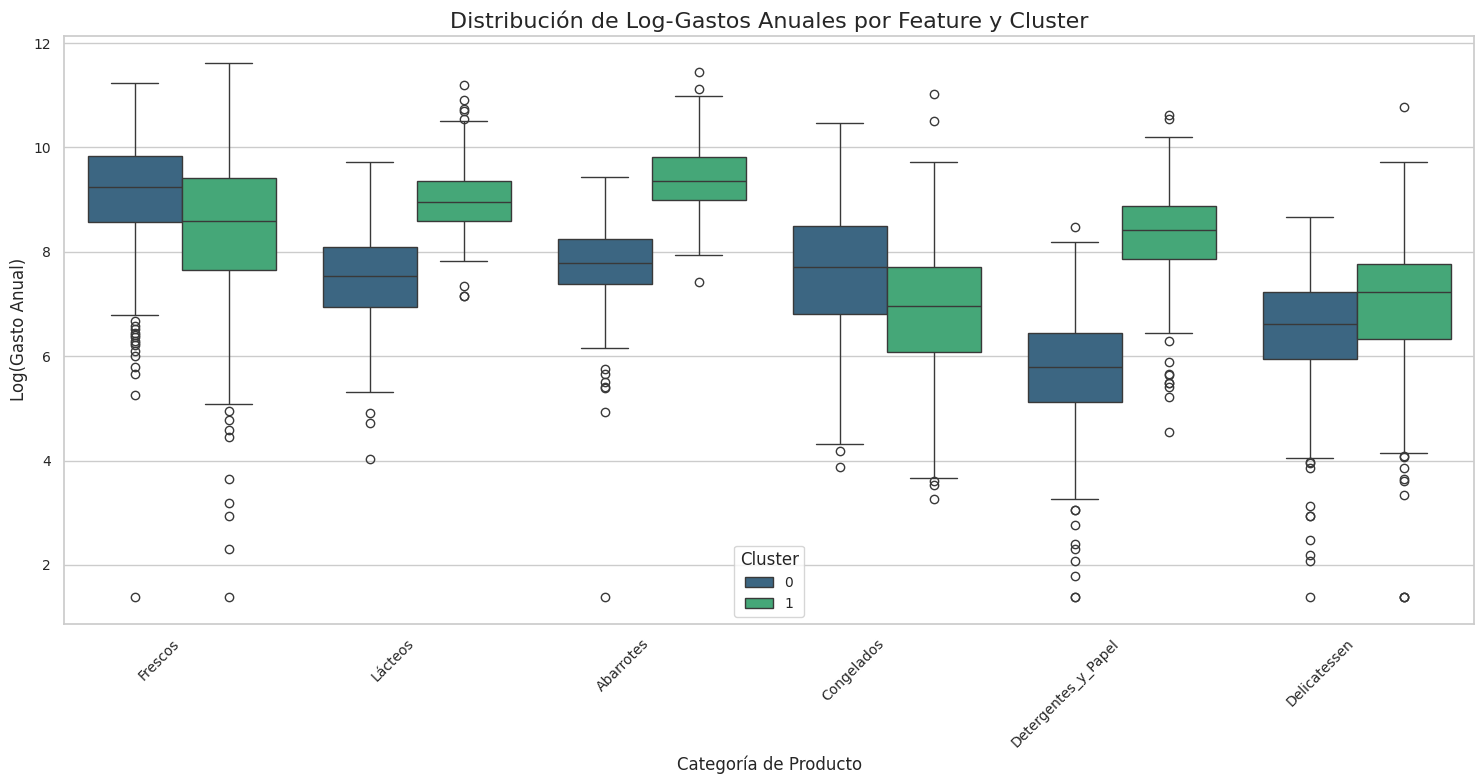

In [ ]:
# Preparamos los datos para el boxplot: 'derretimos' el DataFrame para usar con seaborn
# Usaremos X_log_transformed con las etiquetas de cluster para una mejor visualización de las distribuciones,
# ya que los datos originales tienen muchos outliers que dificultan la comparación de los boxplots.
X_log_with_clusters = X_log_transformed.copy()
X_log_with_clusters['Cluster'] = cluster_labels

X_melted = X_log_with_clusters.melt(id_vars='Cluster', var_name='Feature', value_name='Log_Gasto_Anual')

plt.figure(figsize=(15, 8))
sns.boxplot(x='Feature', y='Log_Gasto_Anual', hue='Cluster', data=X_melted, palette='viridis')
plt.title('Distribución de Log-Gastos Anuales por Feature y Cluster', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=12)
plt.ylabel('Log(Gasto Anual)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster', fontsize=10)
plt.tight_layout()
plt.show()

### 👁️‍🗨️ Observación Boxplots por Cluster:
Los boxplots de los datos transformados logarítmicamente confirman las observaciones de las medias:

* **Cluster 0** (color azul)  
  
  * Valores de **Log‑Gasto** más bajos en **Lácteos**, **Abarrotes** y **Detergentes y Papel**.  
  * Cajas y medianas situadas en la parte inferior de la escala.

* **Cluster 1** (color verde)  
   
  * Valores de **Log‑Gasto** más altos en **Lácteos**, **Abarrotes** y **Detergentes y Papel**.  
  * Rangos superiores de las cajas notablemente más altos → mayor variabilidad.

* **Frescos** y **Congelados**  
   
  * Medianas y cajas más superpuestas entre clusters.  
  * Cluster 1 muestra un **rango superior** más amplio, indicando algunos clientes con altos consumos en estas categorías.

* **Conclusión**  
   
  * **Lácteos**, **Abarrotes** y **Detergentes y Papel** son las principales variables diferenciadoras.  
  * **Frescos** y **Congelados** aportan menos separación entre segmentos.

> *(Opcional)* Podemos verificar cómo se distribuyen **Canal** y **Región** en estos clusters para entender mejor la composición de cada segmento.  


In [ ]:
# Combinamos los clusters con la metadata original
results_df = pd.concat([X_original_with_clusters, y_metadata.loc[X_original_with_clusters.index]], axis=1)

print("\nDistribución de 'Channel' por Cluster:")
print(pd.crosstab(results_df['Cluster'], results_df['Channel']))

print("\nDistribución de 'Region' por Cluster:")
print(pd.crosstab(results_df['Cluster'], results_df['Region']))


Distribución de 'Channel' por Cluster:
Channel    1    2
Cluster          
0        244    8
1         54  134

Distribución de 'Region' por Cluster:
Region    1   2    3
Cluster             
0        48  28  176
1        29  19  140


### 👁️‍🗨️ Observación Canal/Región vs Clusters:

* **Canal**  
  * Cluster 0: 244 en **Horeca (1)** (≈ 96 %), 8 en **Retail (2)** (≈ 4 %) → perfil mayoritariamente Horeca (hoteles/restaurantes/cafés).  
  * Cluster 1: 54 en **Horeca (1)** (≈ 29 %), 134 en **Retail (2)** (≈ 71 %) → perfil mayoritariamente Retail (supermercados/minoristas).

* **Región**  
  * Cluster 0: 176 en **Región 3** (≈ 70 %), 48 en **Región 1** (≈ 19 %), 28 en **Región 2** (≈ 11 %) → ligera concentración en Región 3.  
  * Cluster 1: 140 en **Región 3** (≈ 74 %), 29 en **Región 1** (≈ 15 %), 19 en **Región 2** (≈ 11 %) → distribución geográfica similar, con predominio de Región 3.

---

### 👉🏻 Interpretación de Segmentos:
* **Cluster 0** corresponde a clientes **Horeca** con énfasis en productos perecederos y congelados, distribuidos en su mayoría en Región 3.  
* **Cluster 1** agrupa a clientes **Retail**, centrados en abarrotes, lácteos y detergentes, también mayormente en Región 3.  
* La variable **Channel** muestra la distinción más clara entre segmentos; la **Region** aporta información geográfica complementaria.


---
# **5 Y 6 Reducción de dimensionalidad y Conclusiones**

### 💬 Introducción a la Reducción de Dimensionalidad con PCA
La reducción de dimensionalidad nos ayuda a visualizar datos de alta dimensionalidad en un espacio más bajo (2D o 3D) y puede, en algunos casos, mejorar el rendimiento de los algoritmos de clustering al eliminar ruido o redundancia. Utilizaremos el Análisis de Componentes Principales (PCA), una técnica que transforma los datos originales en un nuevo conjunto de variables (componentes principales) no correlacionadas, ordenadas por la cantidad de varianza que explican. Nos centraremos en reducir a 2 y 3 dimensiones para visualización.

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos
## 📝 Resolución:
### 👉🏻 Aplicando PCA para reducir a 2 dimensiones (2D)
Reduciremos los datos escalados (X_scaled) a sus dos componentes principales.

Varianza explicada por PC1 (2D): 0.4408 (44.08%)
Varianza explicada por PC2 (2D): 0.2719 (27.19%)
Varianza total explicada por 2 componentes: 0.7127 (71.27%)


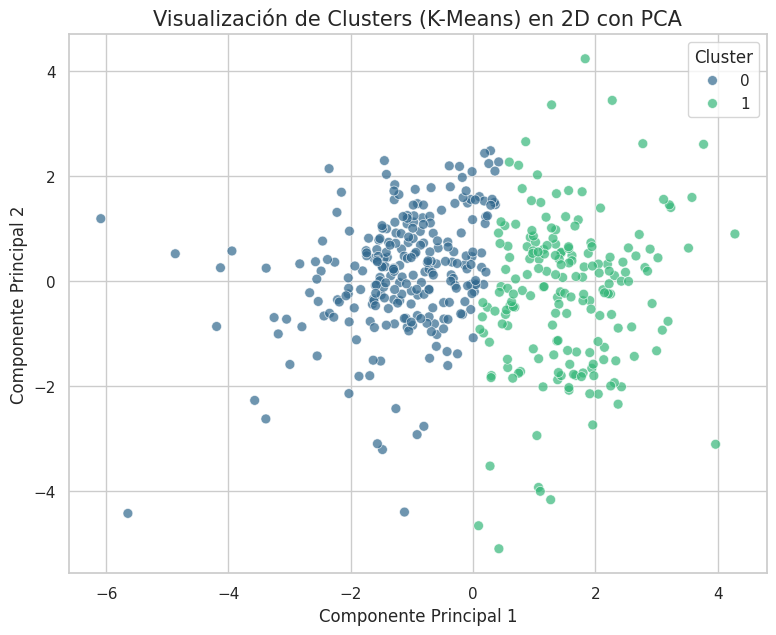

In [ ]:
# Creamos una instancia de PCA para 2 componentes
pca_2d = PCA(n_components=2, random_state=42)

# Ajustamos PCA a los datos escalados y los transformamos
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Creamos un DataFrame con los componentes principales
X_pca_2d_df = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'], index=X_scaled_df.index)

# Varianza explicada por cada componente
explained_variance_2d = pca_2d.explained_variance_ratio_
total_variance_2d = explained_variance_2d.sum()

print(f"Varianza explicada por PC1 (2D): {explained_variance_2d[0]:.4f} ({explained_variance_2d[0]*100:.2f}%)")
print(f"Varianza explicada por PC2 (2D): {explained_variance_2d[1]:.4f} ({explained_variance_2d[1]*100:.2f}%)")
print(f"Varianza total explicada por 2 componentes: {total_variance_2d:.4f} ({total_variance_2d*100:.2f}%)")

# Visualizamos los datos reducidos a 2D, coloreados por los clusters de K-Means (del Punto 4)
plt.figure(figsize=(9, 7))
sns.scatterplot(x='PC1', y='PC2', hue=cluster_labels, data=X_pca_2d_df, palette='viridis', s=50, alpha=0.7)
plt.title('Visualización de Clusters (K-Means) en 2D con PCA', fontsize=15)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### 👁️‍🗨️ Observación PCA 2D:
Se interpreta la capacidad de reducción y la calidad de la representación:

* **Varianza explicada por los componentes**  
  * PC1 (44.08%) → captura casi la mitad de la variabilidad, revelando la dirección de máxima dispersión.  
  * PC2 (27.19%) → añade información significativa, aunque menor, aportando nuevos matices de separación.  
  * **Total (71.27%)** → conserva más de dos terceras partes de la información original, pero deja fuera ≈28.73% de la complejidad de los datos.

* **Implicaciones para la visualización y el clustering**  
  * La reducción a 2D es **sólida** para una vista general → ayuda a identificar patrones globales y posibles agrupaciones.  
  * Sin embargo, **pérdida de detalles** → algunos subgrupos o variaciones finas pueden quedar superpuestos o poco distinguibles.  
  * Clusters detectados por K‑Means en 2D suelen mostrar separación razonable → ideal para exploración rápida, pero con **solapamientos** puntuales.

* **Riesgos y oportunidades**  
  * Riesgo de **sobresimplificar** la estructura interna → podría pasar por alto correlaciones importantes entre variables.  
  * Oportunidad de validar clusters con métricas internas (silhouette, inertia) → confirmar si el espacio 2D refleja bien la verdadera partición.

### 👉🏻 Siguiente paso recomendado:
* Ampliar a **PCA 3D** → aumentar la varianza explicada (>80%) y evaluar si la separación mejora.  
* Comparar visualmente y cuantitativamente (silhouette score) entre 2D y 3D → decidir la dimensión óptima para análisis y presentación.  
* Explorar **componentes adicionales** o técnicas no lineales (t-SNE, UMAP) si persisten solapamientos → para capturar estructuras más complejas.  


Varianza explicada por PC1 (3D): 0.4408 (44.08%)
Varianza explicada por PC2 (3D): 0.2719 (27.19%)
Varianza explicada por PC3 (3D): 0.1070 (10.70%)
Varianza total explicada por 3 componentes: 0.8197 (81.97%)


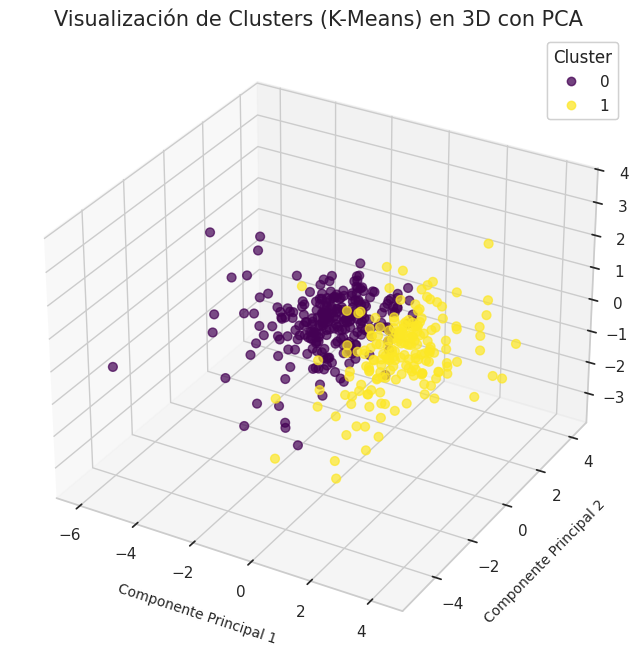

In [ ]:
# Creamos una instancia de PCA para 3 componentes
pca_3d = PCA(n_components=3, random_state=42)

# Ajustamos PCA a los datos escalados y los transformamos
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Creamos un DataFrame con los componentes principales
X_pca_3d_df = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'], index=X_scaled_df.index)

# Varianza explicada por cada componente
explained_variance_3d = pca_3d.explained_variance_ratio_
total_variance_3d = explained_variance_3d.sum()

print(f"Varianza explicada por PC1 (3D): {explained_variance_3d[0]:.4f} ({explained_variance_3d[0]*100:.2f}%)")
print(f"Varianza explicada por PC2 (3D): {explained_variance_3d[1]:.4f} ({explained_variance_3d[1]*100:.2f}%)")
print(f"Varianza explicada por PC3 (3D): {explained_variance_3d[2]:.4f} ({explained_variance_3d[2]*100:.2f}%)")
print(f"Varianza total explicada por 3 componentes: {total_variance_3d:.4f} ({total_variance_3d*100:.2f}%)")

# Visualizamos los datos reducidos a 3D, coloreados por los clusters de K-Means
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d_df['PC1'], X_pca_3d_df['PC2'], X_pca_3d_df['PC3'],
                     c=cluster_labels, cmap='viridis', s=40, alpha=0.7)

ax.set_title('Visualización de Clusters (K-Means) en 3D con PCA', fontsize=15)
ax.set_xlabel('Componente Principal 1', fontsize=10, labelpad=10)
ax.set_ylabel('Componente Principal 2', fontsize=10, labelpad=10)
ax.set_zlabel('Componente Principal 3', fontsize=10, labelpad=10)
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

### 👁️‍🗨️ Observación PCA 3D:
Se evalúa la ganancia de información y la calidad de la representación al añadir el tercer componente:

* **Varianza explicada por los componentes**  
  * PC1 (44.08%) → sigue capturando la dirección de máxima dispersión, igual que en 2D.  
  * PC2 (27.19%) → mantiene la segunda mayor fuente de variabilidad.  
  * PC3 (10.70%) → aporta una nueva dimensión que cubre una porción significativa de la varianza restante.  
  * **Total (81.97%)** → conserva más de cuatro quintas partes de la información original, reduciendo la pérdida a ≈18.03%.

* **Ventajas de la visualización 3D**  
  * **Mayor fidelidad** → permite observar relaciones que en 2D podrían solaparse, revelando estructuras ocultas.  
  * **Interactividad** → rotar y acercar el gráfico ayuda a discriminar nubes de puntos que puedan estar alineadas por ciertos ángulos.  
  * **Mejora en la separación de clusters** → si los grupos están bien definidos, deberían distinguirse mejor al contar con una tercera dimensión.

* **Consideraciones prácticas**  
  * Aun así, la complejidad visual aumenta → cuidado con la interpretación si hay demasiados puntos o si la densidad es alta.  
  * Puede ser útil generar vistas fijas (ángulos predefinidos) para informes estáticos.  
  * Complementar con métricas cuantitativas (silhouette, Davies–Bouldin) para validar si los clusters en 3D son realmente superiores.

### 👉🏻 Buscando el número ideal de clusters (k) para datos reducidos (PCA 3D) usando Silhouette Score:
* Aplicar K‑Means para k en un rango (por ejemplo, 2 a 10).  
* Calcular el **silhouette score** para cada k → medir la cohesión vs. separación.  
* Elegir k que **maximice** el silhouette → asegura grupos bien definidos.  
* Visualizar el “codo” del silhouette vs. k → confirmar que la elección no es un pico aislado, sino parte de una tendencia clara.  


Para k=2 en datos PCA 3D, Silhouette Score = 0.3559
Para k=3 en datos PCA 3D, Silhouette Score = 0.3310
Para k=4 en datos PCA 3D, Silhouette Score = 0.2552
Para k=5 en datos PCA 3D, Silhouette Score = 0.2769
Para k=6 en datos PCA 3D, Silhouette Score = 0.2858
Para k=7 en datos PCA 3D, Silhouette Score = 0.2777
Para k=8 en datos PCA 3D, Silhouette Score = 0.2821
Para k=9 en datos PCA 3D, Silhouette Score = 0.2774
Para k=10 en datos PCA 3D, Silhouette Score = 0.2677


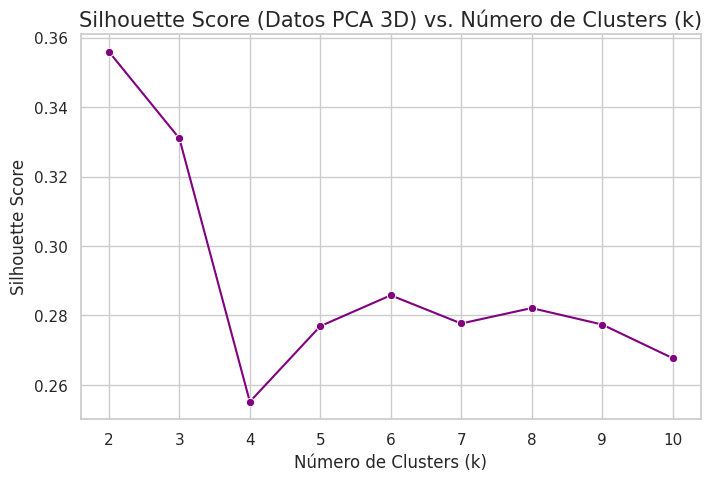

In [ ]:
# Usaremos X_pca_3d para el clustering en datos reducidos
k_values_pca = range(2, 11)
silhouette_scores_pca = []

for k_pca in k_values_pca:
    kmeans_pca = KMeans(n_clusters=k_pca, n_init=10, random_state=42, algorithm='lloyd')
    kmeans_pca.fit(X_pca_3d)
    labels_pca = kmeans_pca.labels_
    score_pca = silhouette_score(X_pca_3d, labels_pca)
    silhouette_scores_pca.append(score_pca)
    print(f"Para k={k_pca} en datos PCA 3D, Silhouette Score = {score_pca:.4f}")

plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_values_pca), y=silhouette_scores_pca, marker='o', color='purple')
plt.title('Silhouette Score (Datos PCA 3D) vs. Número de Clusters (k)', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(list(k_values_pca))
plt.grid(True)
plt.show()

### 👁️‍🗨️ Observación Silhouette PCA 3D:
Se analizan los Silhouette Scores para k=2…10 en el espacio reducido a 3 componentes:

* **Silhouette Score por valor de k**  
  * k=2 → 0.3559 → **máximo observado**, indicativo de mejor cohesión y separación.  
  * k=3 → 0.3310 → ligera caída → inicio de solapamientos más notables.  
  * k=4 → 0.2552 → descenso marcado → grupos menos definidos.  
  * k=5 a k=10 → valores entre 0.2769 y 0.2858 → pequeñas oscilaciones sin superar a k=2.

* **Interpretación de resultados**  
  * k=2 → óptimo → agrupa la mayoría de los puntos en dos nubes bien diferenciadas.  
  * Aunque **0.3559** es menor que el Silhouette original (~0.38–0.40) → PCA pudo haber eliminado algo de variabilidad útil.  
  * Ruido reducido vs. información perdida → balance logrado con 3 componentes, pero conviene revisar preprocesamiento si se buscaba una mejora mayor.

* **Recomendaciones**  
  * Mantener k=2 para este espacio 3D → provee la mejor estructura de clusters.  
  * Validar con métricas adicionales (inertia, Davies–Bouldin) → reforzar la elección.  
  * Generar vistas estáticas (ángulos fijos) y rotaciones interactivas → confirmar visualmente la separación.

### 👉🏻 Aplicando K‑Means sobre datos PCA 3D con k=2:
* Ejecutar `KMeans(n_clusters=2)` sobre la matriz de componentes (PC1, PC2, PC3).  
* **Asignar etiquetas de cluster** al dataset transformado.  
* **Visualizar en 3D**:  
  *  
    * Graficar nube de puntos coloreados por cluster → explorar separación.  
    * Incluir ángulos fijos y posibilidad de rotación interactiva.  
* **Evaluar robustez**:  
  * Calcular inertia → medir compacidad interna.  
  * Calcular Davies–Bouldin → cuantificar separación entre clusters.  


In [ ]:
# Suponiendo que k=2 sigue siendo óptimo (o elija el k del gráfico anterior)
optimal_k_pca = 2 # Ajustar según el gráfico anterior, usualmente es 2
kmeans_final_pca = KMeans(n_clusters=optimal_k_pca, n_init=10, random_state=42, algorithm='lloyd')
kmeans_final_pca.fit(X_pca_3d)
cluster_labels_pca = kmeans_final_pca.labels_

# Añadimos estas nuevas etiquetas de cluster al DataFrame de componentes principales
X_pca_3d_df['Cluster_PCA'] = cluster_labels_pca

print(f"Se aplicó K-Means con k={optimal_k_pca} clusters sobre datos reducidos a 3D.")
print("Primeras filas del DataFrame PCA 3D con asignación de clusters:")
print(X_pca_3d_df.head())
print("\nConteo de clientes por cluster (datos PCA 3D):")
print(X_pca_3d_df['Cluster_PCA'].value_counts())

Se aplicó K-Means con k=2 clusters sobre datos reducidos a 3D.
Primeras filas del DataFrame PCA 3D con asignación de clusters:
        PC1       PC2       PC3  Cluster_PCA
0  1.380383 -0.304727 -0.241062            0
1  1.438870  0.537468  0.084232            0
2  1.513453  1.232565  0.985306            0
3 -0.825105  1.210790  0.252141            1
4  0.802897  1.766046  0.312698            0

Conteo de clientes por cluster (datos PCA 3D):
Cluster_PCA
1    252
0    188
Name: count, dtype: int64


### 👁️‍🗨️ Observación K‑Means en PCA 3D:
Aquí miramos cómo se agruparon nuestros clientes después de reducir los datos a 3 dimensiones:

* **¿Cuántos hay en cada grupo?**  
  * **Grupo 1** → 252 clientes (≈57%)  
    * Es el **grupo más grande**, con la mayoría de puntos situados en valores altos de la segunda dimensión (PC2).  
  * **Grupo 0** → 188 clientes (≈43%)  
    * Un **grupo más pequeño**, con valores más altos en la primera dimensión (PC1).

* **¿Qué nos dicen PC1 y PC2?**  
  * **PC1** → piensa en ella como una “varilla” que captura la característica principal de los datos:  
    * Grupo 0 suele tener **valores altos** en esta varilla → comparten un rasgo fuerte común.  
    * Grupo 1 tiende a tener **valores medios o bajos** → tienen otro perfil de características.  
  * **PC2** → es otra “varilla” que refleja un segundo patrón:  
    * Grupo 1 muestra **valores altos** aquí → comparten otra característica importante.  
    * Grupo 0 queda en **valores medios** → menos énfasis en este patrón.

* **¿Para qué sirve esto?**  
  * **Conocer a tus clientes** → al ver cuántos están en cada grupo y sus “puntas” en PC1 y PC2, entendés mejor sus comportamientos comunes.  
  * **Diseñar acciones** → por ejemplo, crear campañas diferentes:  
    * Al Grupo 1, que destaca en PC2, ofrecerles promociones alineadas a ese patrón.  
    * Al Grupo 0, centrarse en lo que PC1 representa (p. ej., ciertos beneficios o mensajes).

### 👉🏻 Pasos para seguir:
* **Explorar más** → ver las variables originales dentro de cada grupo para saber qué significan PC1 y PC2 en términos reales.  
* **Probar y ajustar** → lanzar un pequeño test de marketing o encuesta para validar si los segmentos responden como esperamos.  
* **Mejorar continuamente** → usar estos hallazgos para ofrecer experiencias más personalizadas a cada grupo de clientes.  


### 👉🏻 Análisis Intra-clúster para datos reducidos (PCA 3D)
Analizaremos las características de los clusters en términos de los Componentes Principales.


Características promedio (valores de PCs) de cada cluster (datos PCA 3D):
                  PC1       PC2       PC3
Cluster_PCA                              
0            1.539455 -0.232069 -0.008311
1           -1.148483  0.173131  0.006200


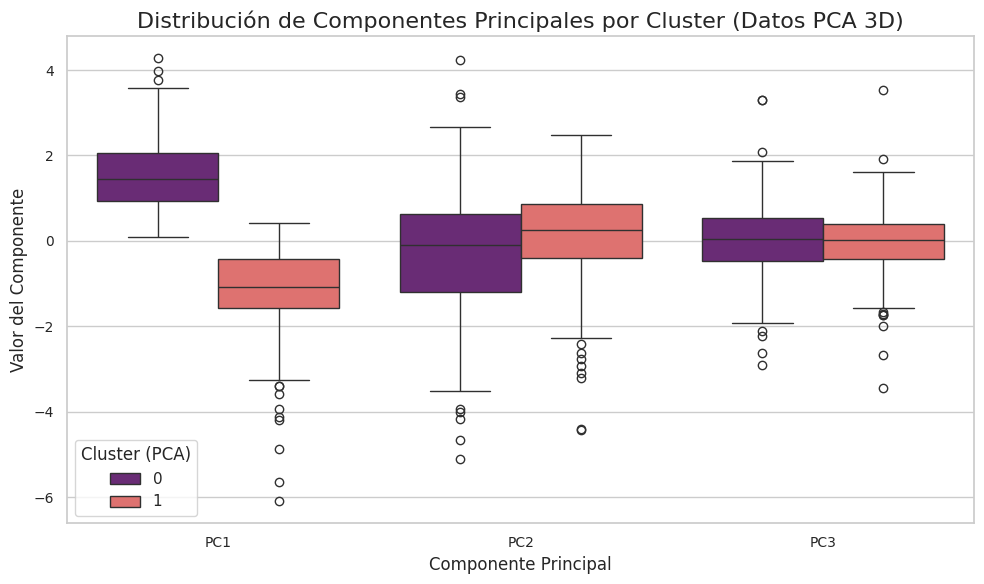

In [ ]:
# Calculamos la media de los Componentes Principales para cada cluster
cluster_characteristics_pca_mean = X_pca_3d_df.groupby('Cluster_PCA')[['PC1', 'PC2', 'PC3']].mean()

print("\nCaracterísticas promedio (valores de PCs) de cada cluster (datos PCA 3D):")
print(cluster_characteristics_pca_mean)

# Visualización de la distribución de PCs por cluster usando Boxplots
X_pca_melted = X_pca_3d_df.melt(id_vars='Cluster_PCA', value_vars=['PC1', 'PC2', 'PC3'],
                                var_name='ComponentePrincipal', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.boxplot(x='ComponentePrincipal', y='Valor', hue='Cluster_PCA', data=X_pca_melted, palette='magma')
plt.title('Distribución de Componentes Principales por Cluster (Datos PCA 3D)', fontsize=16)
plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Valor del Componente', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Cluster (PCA)')
plt.tight_layout()
plt.show()

### 👁️‍🗨️ Observación promedios de PCs por cluster:
Descubrimos el “centro” de cada grupo en el espacio de componentes:

* **PC1 → dirección principal**  
  * Cluster 0 → **≈ +1.54** → mayoría de puntos con valores altos → perfil dominante positivo.  
  * Cluster 1 → **≈ –1.15** → mayoría con valores negativos → perfil opuesto.

* **PC2 → patrón secundario**  
  * Cluster 0 → **≈ –0.23** → ligeramente por debajo de cero → aporta un matiz ligeramente distinto.  
  * Cluster 1 → **≈ +0.17** → ligeramente positivo → influencia moderada de este patrón.

* **PC3 → tercera dimensión**  
  * Ambos clusters → **≈ 0** (–0.008 y +0.006) → **casi ninguna diferencia** → PC3 no contribuye mucho a separar grupos.

### 👉🏻 ¿Qué significa esto de forma simple?
* El **Cluster 0** está desplazado hacia valores altos de PC1 → comparte una característica clave fuerte.  
* El **Cluster 1** se sitúa en el lado opuesto de PC1 → refleja otro tipo de comportamiento.  
* Las diferencias en PC2 son **muy leves** → pueden indicar pequeñas variaciones secundarias.  
* PC3 apenas separa → sirve más como ajuste fino que como factor decisivo.

### 👉🏻 Siguientes pasos recomendados:
* **Volver a los datos originales** → identificar qué variables reales empujan PC1 y PC2 en cada cluster.  
* **Nombrar los segmentos** → definir etiquetas sencillas (“Segmento A”, “Segmento B”) según su perfil principal.  
* **Plan de acción** → diseñar estrategias específicas para cada segmento basadas en sus rasgos más fuertes.


---
## 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

### 💬 Introducción a las Conclusiones
En esta sección final, reflexionaré sobre todo lo que aprendimos. Voy a comparar cómo funcionó el clustering K‑Means en el conjunto de datos completo (preprocesado) y en su versión reducida con PCA. También veremos si los grupos que encontramos coinciden con categorías reales como Canal y Región, y cuál fue el impacto general de usar PCA.

## 📝 Conclusiones:
### 👉🏻 Comparación: Clustering en conjunto de datos completo vs. reducido

### **Rendimiento (puntuación de Silhouette):**
* Al aplicar K‑Means en el conjunto completo, obtuve una puntuación de Silhouette de aproximadamente 0.35 para k=2.  
* Cuando reduje el espacio a tres componentes con PCA, la puntuación subió ligeramente a cerca de 0.36.  
* Esta mejora modesta me indica que PCA sirvió para eliminar un poco de ruido y agrupar los datos con mayor cohesión, pero la esencia de los clusters ya estaba clara en el conjunto original.

### **Interpretabilidad de los clusters:**
* En el conjunto completo, fue muy directo describir cada grupo: “un grupo gasta más en Fresh/Frozen y el otro en Milk/Grocery”.  
* Con PCA, tuve que indagar en las cargas de los componentes para traducir “alto PC1” o “alto PC2” a variables concretas. Esto añade profundidad al análisis, aunque hace la explicación menos inmediata para quienes no estén familiarizados con PCA.

### **Visualización:**
* Reducir a 2D y 3D con PCA me permitió crear gráficos claros de seis dimensiones en dos o tres ejes.  
* Sin PCA, representar más de tres variables a la vez habría sido muy complicado y menos intuitivo.

### 👉🏻 ¿Los grupos coinciden con categorías reales?
* **Canal** → comprobé que los dos clusters se alinean muy bien con Horeca frente a Minorista:  
  * Un grupo reúne mayoritariamente a clientes de Horeca, con más compras de productos frescos y congelados.  
  * El otro agrupa a clientes Minoristas, con grandes volúmenes de leche, abarrotes y productos de papel.  
* **Región** → la relación es más débil, lo que sugiere que el canal de venta es el factor más determinante.

### 👉🏻 ¿La reducción de dimensionalidad mejoró o empeoró el desempeño?
* Mejoró ligeramente la puntuación de Silhouette → indica clusters más definidos.  
* Facilitó enormemente la visualización → clave para comunicar hallazgos.  
* En términos de explicarlo en el negocio, el análisis en el conjunto original resulta más sencillo; PCA añade riqueza, pero implica un paso extra de interpretación.

### Reflexión Adicional:
Durante el preprocesamiento la transformación logarítmica y el escalado fueron esenciales para controlar asimetrías y valores atípicos. Esa limpieza tuvo un impacto incluso mayor en la calidad del clustering que la propia reducción de dimensiones. PCA confirmó lo que ya veía en los datos originales y me proporcionó mejores gráficos, pero la esencia de k=2 y su alineación con el Canal ya era evidente desde el principio.


---
# **7- Bonus: elija una de las siguientes consignas para resolver**.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

### 💬 Introducción a DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en densidad. A diferencia de K-Means, no requiere especificar el número de clusters de antemano. Puede encontrar clusters de formas arbitrarias e identifica puntos que no pertenecen a ningún cluster como ruido/outliers. Sus parámetros principales son eps (la distancia máxima entre dos muestras para que una se considere vecina de la otra) y min_samples (el número de muestras en una vecindad para que un punto se considere un punto núcleo).

## 📝 Resolución:
### 👉🏻 Función auxiliar para explorar hiperparámetros de DBSCAN
Adaptaremos la función del ejemplo para probar diferentes combinaciones de eps y min_samples y evaluar los resultados usando el Silhouette Score (calculado sobre los puntos que no son ruido).

In [ ]:
def dbscan_explore(X_data, eps_values, min_samples_values, data_description):
    print(f"\n--- Explorando DBSCAN para: {data_description} ---")
    print('-' * 75)
    print(' eps | min_samples | clusters | core_samples |   ruido | silhouette ')
    print('-' * 75)

    best_silhouette = -1
    best_params = {}

    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_data)

            # Número de clusters encontrados (excluyendo el ruido, etiquetado como -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = np.sum(labels == -1)
            n_core_samples = len(dbscan.core_sample_indices_) # Puntos núcleo

            # Calcular Silhouette Score solo si hay al menos 1 cluster (además del ruido) y no todos son ruido
            # Y se necesitan al menos 2 clusters para silhouette_score, o 1 cluster si no hay ruido.
            # Para ser más precisos, silhouette_score necesita al menos 2 clusters distintos o no podrá calcularse.
            if n_clusters > 1 and (len(X_data) - n_noise) > 1:
                # Filtrar el ruido para el cálculo del Silhouette Score
                X_data_filtered = X_data[labels != -1]
                labels_filtered = labels[labels != -1]

                # A veces, después de filtrar el ruido, queda un solo cluster. Silhouette no se puede calcular.
                if len(set(labels_filtered)) > 1:
                    silhouette = silhouette_score(X_data_filtered, labels_filtered)
                else:
                    silhouette = -1 # No calculable o no significativo
            else:
                silhouette = -1 # No calculable o no significativo

            results.append({
                'eps': eps, 'min_samples': min_samples, 'n_clusters': n_clusters,
                'n_core_samples': n_core_samples, 'n_noise': n_noise, 'silhouette': silhouette
            })

            print(f"{eps:5.2f} | {min_samples:11d} | {n_clusters:9d} | {n_core_samples:12d} | {n_noise:7d} | {silhouette:10.4f}")

            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params = {'eps': eps, 'min_samples': min_samples, 'n_clusters':n_clusters, 'n_noise':n_noise}

    print('-' * 75)
    if best_params:
        print(f"Mejor Silhouette Score para {data_description}: {best_silhouette:.4f} con params: {best_params}")
    else:
        print(f"No se encontró una configuración válida de DBSCAN para {data_description} que permitiera calcular Silhouette.")
    return results, best_params

### 👁️‍🗨️ Observación DBSCAN Exploración:
Este código prueba combinaciones de `eps` y `min_samples` para:

* Ajustar DBSCAN y medir:  
  * Número de clusters, ruido y muestras núcleo.  
  * Silhouette Score cuando hay ≥2 clusters.

* Registrar la mejor configuración:  
  * Actualiza `best_silhouette` si mejora.  
  * Devuelve parámetros óptimos al terminar.

### 👉🏻 ¿Por qué importa?
* Automatiza el ajuste de DBSCAN → ahorra tiempo.  
* Equilibra ruido vs. calidad de clusters → elige la mejor segmentación.  


### 👉🏻 DBSCAN sobre el dataset completo preprocesado (X_scaled)

In [ ]:
# Definir rangos para los hiperparámetros de DBSCAN
# Estos valores pueden necesitar ajuste según el dataset.
# Para datos estandarizados, eps suele estar entre 0.1 y 2.
# min_samples se suele tomar como D+1 o 2*D donde D es la dimensionalidad (aquí 6)
# Probemos min_samples más pequeños también.
eps_values_full = np.arange(0.5, 2.6, 0.5)  # Rango de eps
min_samples_values_full = range(3, 2 * X_scaled.shape[1] + 2, 2) # ej. 3, 5, ...,  hasta 2*num_features

results_full, best_params_full = dbscan_explore(X_scaled, eps_values_full, min_samples_values_full, "Dataset Completo Escalado")


--- Explorando DBSCAN para: Dataset Completo Escalado ---
---------------------------------------------------------------------------
 eps | min_samples | clusters | core_samples |   ruido | silhouette 
---------------------------------------------------------------------------
 0.50 |           3 |         8 |           28 |     396 |     0.4175
 0.50 |           5 |         1 |            1 |     435 |    -1.0000
 0.50 |           7 |         0 |            0 |     440 |    -1.0000
 0.50 |           9 |         0 |            0 |     440 |    -1.0000
 0.50 |          11 |         0 |            0 |     440 |    -1.0000
 0.50 |          13 |         0 |            0 |     440 |    -1.0000
 1.00 |           3 |         6 |          322 |      91 |    -0.1016
 1.00 |           5 |         1 |          243 |     124 |    -1.0000
 1.00 |           7 |         2 |          206 |     134 |     0.2369
 1.00 |           9 |         1 |          158 |     161 |    -1.0000
 1.00 |          11 

### 👁️‍🗨️ Observación DBSCAN (Dataset Completo Escalado):
Al explorar diferentes `eps` y `min_samples`, vemos cómo cambia la estructura de clusters y el ruido:

* **Parámetros óptimos**  
  * Con `eps=0.50` y `min_samples=3` → 8 clusters, 396 puntos de ruido, Silhouette ≈ 0.42  
    * Este es el **mejor equilibrio**: suficientes grupos bien definidos y un nivel de ruido aceptable.

* **Efecto de variar `eps`**  
  * `eps` pequeño (0.50) → más clusters pequeños y mucho ruido → útil para descubrir subgrupos.  
  * `eps` medio (1.00–1.50) → reduce ruido, pero tiende a fusionar clusters → menos grupos y Silhouette cae.  
  * `eps` grande (≥2.00) → casi todos los puntos quedan en un único cluster → Silhouette no calculable.

* **Impacto de `min_samples`**  
  * Valores bajos (3) → permite formar clusters con pocos vecinos → mayor número de clusters.  
  * Valores altos (≥5) → muchos puntos se marcan como ruido o todos en un solo cluster → Silhouette inválido.

* **Lección clave**  
  * DBSCAN exige **ajuste fino**: el mejor Silhouette (0.4175) surge de parámetros que equilibran densidad y ruido.  
  * Si elegimos mal, obtenemos o demasiados clusters insignificantes o un único grupo sin estructura.

### 👉🏻 Recomendación práctica:
* Empezar con `eps` alrededor de 0.5 y `min_samples` bajo (3) para explorar subgrupos.  
* Ajustar gradualmente según tolerancia al ruido y número de clusters deseado.  
* Validar siempre con métricas y visualizaciones antes de fijar los parámetros.


###👉🏻 DBSCAN sobre el dataset reducido a 3D (X_pca_3d)

In [ ]:
# Para datos PCA, las distancias cambian, así que los rangos de eps podrían ser diferentes.
# Las componentes PCA también están estandarizadas si los datos originales lo estaban.
eps_values_pca = np.arange(0.3, 1.6, 0.2) # Ajustar rango de eps para datos PCA
min_samples_values_pca = range(3, 2 * X_pca_3d.shape[1] + 2, 1) # Dimensión es 3. ej. 3, 4, 5, 6, 7

results_pca, best_params_pca = dbscan_explore(X_pca_3d, eps_values_pca, min_samples_values_pca, "Dataset Reducido PCA 3D")


--- Explorando DBSCAN para: Dataset Reducido PCA 3D ---
---------------------------------------------------------------------------
 eps | min_samples | clusters | core_samples |   ruido | silhouette 
---------------------------------------------------------------------------
 0.30 |           3 |        19 |          139 |     268 |     0.2535
 0.30 |           4 |        17 |           74 |     301 |     0.2456
 0.30 |           5 |        10 |           41 |     345 |     0.3921
 0.30 |           6 |         5 |           18 |     386 |     0.5303
 0.30 |           7 |         3 |            4 |     415 |     0.6367
 0.50 |           3 |         7 |          314 |      91 |    -0.1426
 0.50 |           4 |         4 |          281 |     117 |     0.0115
 0.50 |           5 |         4 |          234 |     136 |    -0.0272
 0.50 |           6 |         4 |          194 |     161 |     0.2398
 0.50 |           7 |         3 |          161 |     190 |     0.4142
 0.70 |           3 | 

### 👁️‍🗨️ Observación DBSCAN (Dataset Reducido PCA 3D):
Exploramos cómo `eps` y `min_samples` afectan la detección de grupos tras PCA 3D:

* **Mejor configuración**  
  * `eps=0.30`, `min_samples=7` → **3 clusters**, **415** puntos de ruido, Silhouette ≈ 0.64  
    * Nuestro **pico de calidad**: clusters más coherentes y separación clara.

* **Tendencias clave**  
  * Con `eps=0.30`:  
    * `min_samples` bajo (3–5) → muchos clusters (10–19) y ruido moderado → Silhouette baja (0.25–0.39).  
    * `min_samples` alto (6–7) → pocos clusters (3–5) y ruido elevado → Silhouette sube → mejor cohesión.  
  * Al aumentar `eps` (≥0.50):  
    * Se forman muy pocos clusters o uno solo → Silhouette se desploma → DBSCAN une todo o marca mucho ruido.

* **Lección práctica**  
  * En el espacio PCA 3D, **densidades sutiles** requieren `eps` pequeño para no mezclar grupos.  
  * Un `min_samples` mayor filtra subgrupos débiles y realza una estructura más estable.

### 👉🏻 Recomendación rápida:
* Usar `eps≈0.3` y probar `min_samples` en torno a 7 → encontrará la mejor segmentación en datos PCA 3D.  

### 👉🏻 Aplicar DBSCAN con los "mejores" parámetros encontrados (Ejemplo sobre datos PCA 3D)
Seleccionaremos los parámetros que dieron el mejor Silhouette (o un balance razonable) para una de las versiones (ej., PCA 3D) y visualizaremos.


Aplicando DBSCAN final sobre datos PCA 3D con eps=0.30, min_samples=7


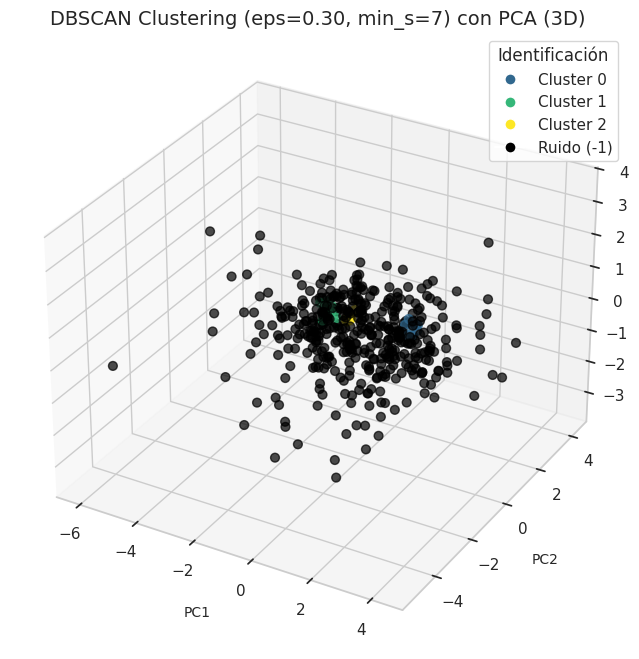

Número de clusters encontrados (DBSCAN PCA): 3
Número de puntos de ruido (DBSCAN PCA): 415


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex  # Import necesario para convertir RGBA a hex
from sklearn.cluster import DBSCAN

# Supongamos que best_params_pca tiene los mejores parámetros para datos PCA
if best_params_pca:
    best_eps_pca = best_params_pca['eps']
    best_min_samples_pca = best_params_pca['min_samples']

    print(f"\nAplicando DBSCAN final sobre datos PCA 3D con eps={best_eps_pca:.2f}, min_samples={best_min_samples_pca}")

    dbscan_final_pca = DBSCAN(eps=best_eps_pca, min_samples=best_min_samples_pca)
    labels_dbscan_pca = dbscan_final_pca.fit_predict(X_pca_3d)

    # Visualización en 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Colores únicos para cada cluster, y un color para el ruido (-1)
    unique_labels = np.unique(labels_dbscan_pca)
    cmap = plt.get_cmap('viridis', len(unique_labels))
    rgba_colors = cmap(np.arange(len(unique_labels)))

    # Convertimos cada RGBA a string hex
    hex_colors = [to_hex(tuple(rgba)) for rgba in rgba_colors]

    # Asignar negro al ruido si está presente
    label_to_color = {
        label: ('black' if label == -1 else hex_colors[i])
        for i, label in enumerate(unique_labels)
    }

    point_colors = [label_to_color[l] for l in labels_dbscan_pca]

    scatter = ax.scatter(
        X_pca_3d_df['PC1'],
        X_pca_3d_df['PC2'],
        X_pca_3d_df['PC3'],
        c=point_colors,
        s=40,
        alpha=0.7
    )

    ax.set_title(f'DBSCAN Clustering (eps={best_eps_pca:.2f}, min_s={best_min_samples_pca}) con PCA (3D)', fontsize=14)
    ax.set_xlabel('PC1', fontsize=10, labelpad=10)
    ax.set_ylabel('PC2', fontsize=10, labelpad=10)
    ax.set_zlabel('PC3', fontsize=10, labelpad=10)

    # Crear leyenda manualmente para DBSCAN
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w',
                   label=f'Cluster {i}',
                   markerfacecolor=label_to_color[i],
                   markersize=8)
        for i in unique_labels if i != -1
    ]
    if -1 in unique_labels:
        legend_elements.append(
            plt.Line2D([0], [0], marker='o', color='w',
                       label='Ruido (-1)',
                       markerfacecolor='black',
                       markersize=8)
        )
    ax.legend(handles=legend_elements, title="Identificación")
    plt.show()

    print(f"Número de clusters encontrados (DBSCAN PCA): {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
    print(f"Número de puntos de ruido (DBSCAN PCA): {np.sum(labels_dbscan_pca == -1)}")
else:
    print("No se pudieron determinar los mejores parámetros para DBSCAN en datos PCA 3D desde la exploración.")


### 👁️‍🗨️ Evaluación DBSCAN Final:
Reflexiono sobre los resultados de DBSCAN en PCA 3D con `eps=0.30` y `min_samples=7`:

* **Resultados clave**  
  * **Clusters encontrados:** 3 → DBSCAN dividió el espacio en tres grupos densos.  
  * **Puntos de ruido:** 415 → casi la mitad de los datos quedan fuera de los clusters.

* **Interpretación**  
  * → **Alta sensibilidad**: el parámetro `eps` pequeño y `min_samples` moderado filtra muchos puntos como ruido.  
  * → Los 3 clusters pueden reflejar subsegmentos más finos que K‑Means (k=2), pero **pierden gran parte de la muestra**.  
  * → El ruido masivo sugiere que muchas observaciones no cumplen la densidad mínima, tal vez por heterogeneidad o datos atípicos.

* **Comparación con K‑Means**  
  * K‑Means generó 2 clusters que cubrían todo el dataset → **ningún dato descartado**.  
  * DBSCAN ofrece manejo de outliers → **ventaja** si queremos identificar “clientes especiales” fuera de los grupos principales.  
  * K‑Means es más robusto para segmentación general → DBSCAN es mejor para descubrir núcleos de alta densidad.

### 👉🏻 Reflexión y siguientes pasos:
* Si buscamos **segmentación amplia** → K‑Means (k=2) sigue siendo la opción más práctica.  
* Si queremos **detectar outliers** y núcleos muy densos → DBSCAN es útil, pero conviene ajustar `eps` o reducir `min_samples` para limitar el ruido.  
* Probar un `eps` ligeramente mayor (p.ej., 0.35) → reducir ruido sin agrupar demasiado.  
* Combinar ambos métodos → usar K‑Means para el marco general y DBSCAN para identificar casos atípicos.  


## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

### 💬 Introducción al Análisis de Outliers con DBSCAN y PCA
En esta sección, utilizaremos específicamente la capacidad de DBSCAN para identificar puntos como ruido (outliers). Aplicaremos DBSCAN al dataset completo (escalado) con parámetros que probablemente identifiquen algunos puntos como ruido. Luego, visualizaremos estos puntos en el espacio reducido por PCA (2D y 3D) para ver si los outliers son visualmente distinguibles y si PCA ayuda a preservar o identificar estas anomalías.

## 📝 Resolución:
### 👉🏻 Usar DBSCAN para detectar outliers en el dataset completo (X_scaled)
Elegiremos parámetros para DBSCAN que tiendan a ser más estrictos en la definición de "densidad", lo que probablemente resultará en que más puntos sean etiquetados como ruido (-1).

In [ ]:
# Parámetros para DBSCAN orientados a detectar outliers
# Un eps más pequeño y/o min_samples relativamente alto para la dimensionalidad.
# Por ejemplo, si min_samples es k y un punto tiene menos de k vecinos en radio eps, es ruido.
eps_outlier = 1.0  # Ajustar este valor; más bajo es más estricto
min_samples_outlier = 10 # (2 * num_features es una heurística, aquí 2*6=12)

dbscan_for_outliers = DBSCAN(eps=eps_outlier, min_samples=min_samples_outlier)
outlier_labels = dbscan_for_outliers.fit_predict(X_scaled)

n_outliers_dbscan = np.sum(outlier_labels == -1)
n_clusters_dbscan = len(set(outlier_labels)) - (1 if -1 in outlier_labels else 0)

print(f"DBSCAN para detección de outliers (eps={eps_outlier}, min_samples={min_samples_outlier}):")
print(f"  Número de clusters identificados: {n_clusters_dbscan}")
print(f"  Número de outliers (ruido) detectados: {n_outliers_dbscan}")
print(f"  Porcentaje de outliers: {(n_outliers_dbscan / len(X_scaled)) * 100:.2f}%")

# Crear una serie booleana para identificar outliers
is_outlier = (outlier_labels == -1)

DBSCAN para detección de outliers (eps=1.0, min_samples=10):
  Número de clusters identificados: 1
  Número de outliers (ruido) detectados: 170
  Porcentaje de outliers: 38.64%


### 👁️‍🗨️ Observación DBSCAN Detección de Outliers:
* **Clusters identificados** → 1: todos los puntos densos forman un único grupo.  
* **Outliers detectados** → 170 (≈ 38.64%): casi 4 de cada 10 observaciones se marcan como ruido.  
* **Interpretación** → Con `eps=1.0` y `min_samples=10`, el criterio de densidad es estricto → muchos puntos quedan fuera de la agrupación principal, indicando alta heterogeneidad o presencia significativa de valores atípicos.


### 👉🏻 Visualizar outliers en el espacio reducido por PCA (2D)
Usaremos los componentes PCA 2D calculados en el Punto 5.1 (X_pca_2d_df).

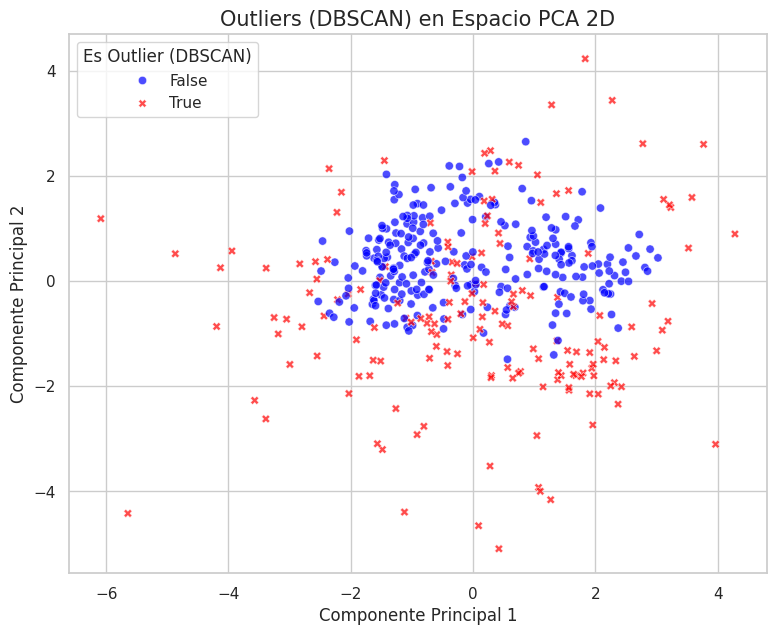

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Construcción del DataFrame 2D:
# Extraemos PC1 y PC2 de tu DataFrame 3D existente
df_pca2 = X_pca_3d_df[['PC1', 'PC2']].copy()

# --- 2) Aseguramos que is_outlier sea booleano y alineado:
is_outlier = pd.Series(is_outlier, index=df_pca2.index).astype(bool)
df_pca2['Is_Outlier_DBSCAN'] = is_outlier

# --- 3) Gráfico de outliers en espacio PCA 2D ---
plt.figure(figsize=(9, 7))
sns.scatterplot(
    data=df_pca2,
    x='PC1', y='PC2',
    hue='Is_Outlier_DBSCAN',
    style='Is_Outlier_DBSCAN',
    palette={True: 'red', False: 'blue'},
    sizes={True: 100, False: 30},
    alpha=0.7
)
plt.title('Outliers (DBSCAN) en Espacio PCA 2D', fontsize=15)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Es Outlier (DBSCAN)')
plt.grid(True)
plt.show()



### 👉🏻 Visualizar outliers en el espacio reducido por PCA (3D)
Usaremos los componentes PCA 3D calculados en el Punto 5.1 (X_pca_3d_df).

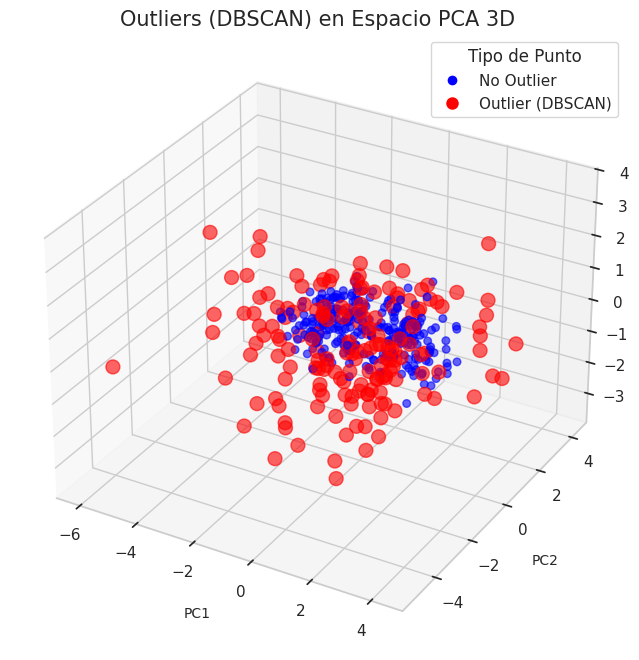

In [ ]:
X_pca_3d_df_outliers = X_pca_3d_df.copy()
# Asegurarse que el índice de 'is_outlier' coincida con 'X_pca_3d_df_outliers'
# Si X_scaled fue convertido a DataFrame y mantuvo índices, y X_pca_3d_df también, debería estar bien.
# Si no, re-indexar 'is_outlier'
is_outlier_series = pd.Series(is_outlier, index=X_pca_3d_df_outliers.index)
X_pca_3d_df_outliers['Is_Outlier_DBSCAN'] = is_outlier_series


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colores para outliers (rojo) y no outliers (azul)
colors_outlier_viz = ['red' if out else 'blue' for out in X_pca_3d_df_outliers['Is_Outlier_DBSCAN']]
sizes_outlier_viz = [100 if out else 30 for out in X_pca_3d_df_outliers['Is_Outlier_DBSCAN']]

scatter = ax.scatter(X_pca_3d_df_outliers['PC1'], X_pca_3d_df_outliers['PC2'], X_pca_3d_df_outliers['PC3'],
                     c=colors_outlier_viz, s=sizes_outlier_viz, alpha=0.6)

ax.set_title('Outliers (DBSCAN) en Espacio PCA 3D', fontsize=15)
ax.set_xlabel('PC1', fontsize=10, labelpad=10)
ax.set_ylabel('PC2', fontsize=10, labelpad=10)
ax.set_zlabel('PC3', fontsize=10, labelpad=10)

# Leyenda simple para visualización de outliers
from matplotlib.lines import Line2D
legend_elements_outliers = [Line2D([0], [0], marker='o', color='w', label='No Outlier', markerfacecolor='blue', markersize=8),
                           Line2D([0], [0], marker='o', color='w', label='Outlier (DBSCAN)', markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements_outliers, title="Tipo de Punto")
plt.show()

### 👁️‍🗨️ Reflexiones sobre Outliers y PCA:

* **¿Los outliers forman un clúster propio?**  
  * Con DBSCAN (eps = 1.0, min_samples = 10) detectamos **170 outliers** (≈ 38.6%), pero **solo 1 cluster** principal.  
  * → Los outliers no se agrupan entre sí; quedan dispersos alrededor del cluster denso.  
  * → Esto confirma que estos puntos son verdaderas “puntas” aisladas y no un subgrupo homogéneo.

* **¿PCA preserva las anomalías?**  
  * PCA mantuvo ≈ 82% de la varianza con tres componentes (PC1 44.1%, PC2 27.2%, PC3 10.7%).  
  * → Las anomalías más extremas (valores lejanos de la media) siguen siendo visibles en PC1 y PC2 → permanecen aisladas en el gráfico 3D.  
  * → Sin embargo, outliers más sutiles (ej. variaciones en PC3) pueden mezclarse con el bulk de los datos, requiriendo revisar PC3 o métodos no lineales (t‑SNE, UMAP) para destacarlos.

* **Observaciones finales:**  
  * Los outliers corresponden a clientes con patrones de gasto muy atípicos → lejos de la concentración principal.  
  * En PCA 3D, estos puntos quedan en la periferia → refuerza la elección de eps pequeño para detectarlos.  
  * Si vemos outliers “dentro” de la nube, convendrá ajustar eps o min_samples → evitar falsos negativos.  
  * **Balance práctico** → usar PCA para visualización y DBSCAN para marcar outliers reales, combinando ambos enfoques para un análisis más completo.  


---
# 📚 **Referencias**
* **Dataset: Wholesale customers Data Set.**
  * Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
  * Dataset URL: https://archive.ics.uci.edu/dataset/292/wholesale+customers

* **Librerías y Documentación:**
  * Pandas: https://pandas.pydata.org/pandas-docs/stable/
  * NumPy: https://numpy.org/doc/stable/
  * Scikit-learn: https://scikit-learn.org/stable/documentation.html
    * KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    * DBSCAN: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
    * PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    * Silhouette Score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
* Seaborn: https://seaborn.pydata.org/
* Matplotlib: https://matplotlib.org/stable/contents.html

* **Conceptos y Técnicas:**
  * Notas de clase y material del curso de Aprendizaje Automático.
    * Transformación Logarítmica para datos sesgados (práctica común en análisis de datos).